PREPARAÇÃO DE DADOS - DEEPFASHION-1
Projeto: Reconhecimento de Roupas para Deficientes Visuais
Dataset encontrado no Kaggle: /kaggle/input/deepfashion-1

Usando dataset em: /kaggle/input/deepfashion-1

------------------------------------------------------------
ETAPA 1: Explorando estrutura do dataset
------------------------------------------------------------

Explorando estrutura do dataset em: /kaggle/input/deepfashion-1
Percorrendo arquivos...

ESTRUTURA DO DATASET
Total de arquivos: 34465
Total de imagens: 34452

Extensões encontradas:
  .png: 34452 arquivos

Total de diretórios: 10
Primeiros 10 diretórios:
  datasets
  datasets/train_images
  datasets/texture_ann
  datasets/segm
  datasets/shape_ann
  datasets/densepose
  datasets/test_images
  datasets/texture_ann/val
  datasets/texture_ann/test
  datasets/texture_ann/train

Exemplos de caminhos de imagens (primeiras 5):
  /kaggle/input/deepfashion-1/datasets/train_images/WOMEN-Sweaters-id_00005253-06_1_front.png
  /kaggle/inp

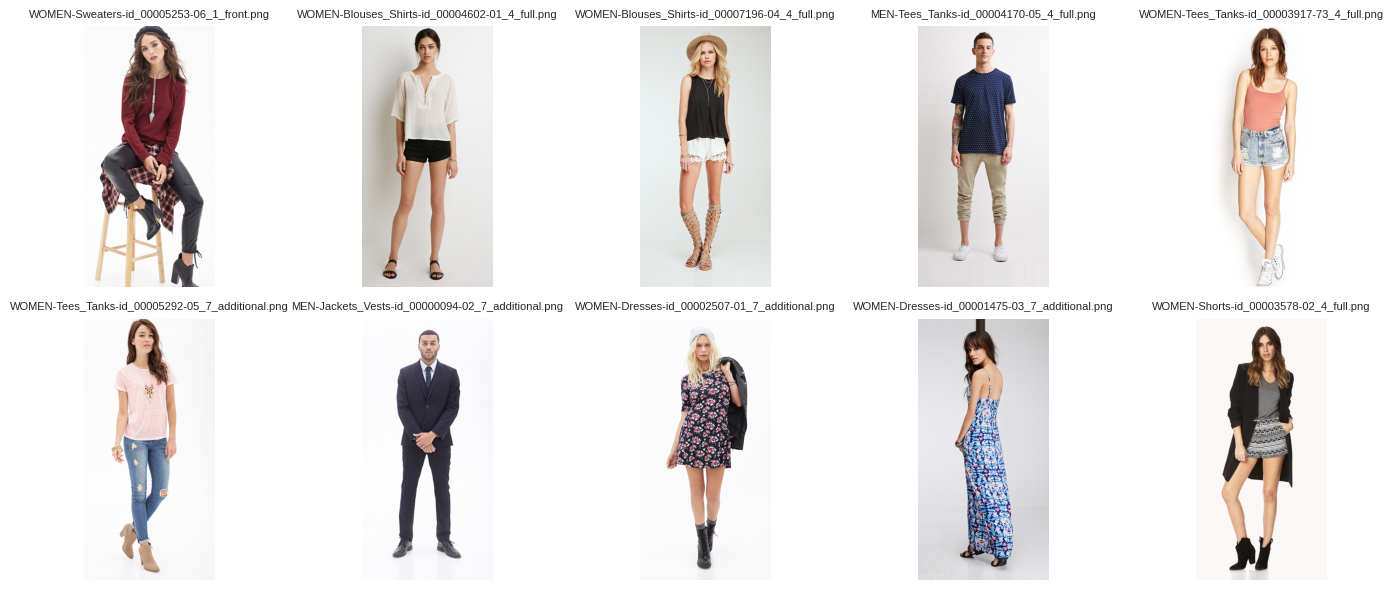


------------------------------------------------------------
ETAPA 3: Extraindo categorias dos nomes dos arquivos
------------------------------------------------------------

Extraindo categorias dos nomes dos arquivos...
Total de imagens encontradas: 34452
Categorias extraídas de 34452 imagens
Categorias únicas encontradas: 17

Primeiras categorias:
categoria
Tees_Tanks           8655
Dresses              6513
Blouses_Shirts       4578
Sweaters             2253
Shorts               2064
Pants                1974
Rompers_Jumpsuits    1836
Jackets_Coats        1407
Skirts               1152
Cardigans            1143
Name: count, dtype: int64

------------------------------------------------------------
ETAPA 4: Analisando distribuição de categorias
------------------------------------------------------------
Gráfico salvo como 'bloco01_distribuicao_categorias.png'


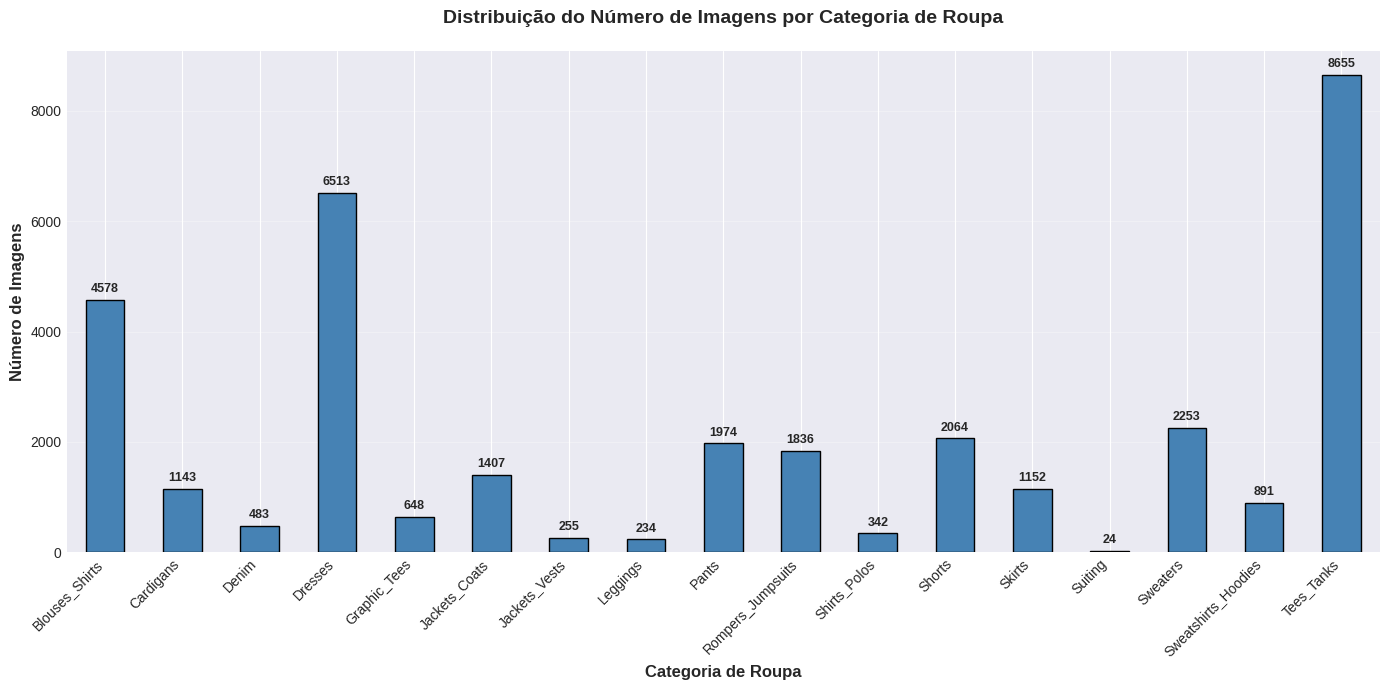


ESTATÍSTICAS DA DISTRIBUIÇÃO
Total de categorias: 17
Total de imagens: 34452
Média de imagens por categoria: 2026.59
Mediana: 1152.00
Desvio padrão: 2389.66

Categoria com mais imagens: Tees_Tanks (8655 imagens)
Categoria com menos imagens: Suiting (24 imagens)

PREPARAÇÃO DE DADOS CONCLUÍDA COM SUCESSO!
Total de imagens encontradas: 34452
Total de categorias: 17
Próximo passo: Execute o script 02_preprocessamento.py
Resumo salvo em: bloco01_saida.txt


In [1]:
"""
Script de Preparação de Dados para Classificação de Roupas
Projeto: Reconhecimento de categoria de roupas para pessoas com deficiência visual
Dataset: DeepFashion-1 (Kaggle)
"""

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import zipfile
from pathlib import Path
import kagglehub
import gdown

# Configuração de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

def baixar_dataset_kaggle():
    """
    Baixa o dataset DeepFashion-1 do Kaggle usando kagglehub.
    
    Returns:
        str: Caminho para os arquivos do dataset
    
    Exemplo de uso:
        path = baixar_dataset_kaggle()
        print(f"Dataset baixado em: {path}")
    """
    # No Kaggle, os datasets já estão disponíveis em /kaggle/input/
    kaggle_path = '/kaggle/input/deepfashion-1'
    if os.path.exists(kaggle_path):
        print(f"Dataset encontrado no Kaggle: {kaggle_path}")
        return kaggle_path
    
    # Se não estiver no Kaggle, tenta baixar usando kagglehub
    try:
        path = kagglehub.dataset_download("vishalbsadanand/deepfashion-1")
        print("Caminho para os arquivos do dataset:", path)
        return path
    except Exception as e:
        print(f"Erro ao baixar dataset: {e}")
        print("Tentando usar caminho padrão do Kaggle...")
        return kaggle_path

def baixar_dataset_google_drive(drive_file_id, output_path='./deepfashion_data.zip'):
    """
    Alternativa: Baixa o dataset do Google Drive (caso prefira usar esta opção).
    
    Args:
        drive_file_id (str): ID do arquivo no Google Drive
        output_path (str): Caminho onde o arquivo será salvo
    
    Returns:
        str: Caminho do arquivo baixado
    
    Nota:
        Para usar esta função, insira o ID do seu arquivo Google Drive no parâmetro drive_file_id
        Exemplo: drive_file_id = "SEU_ID_AQUI"
    """
    
    # URL do Google Drive no formato correto
    url = f'https://drive.google.com/uc?id={drive_file_id}'
    
    # Baixa o arquivo
    print(f"Baixando dataset do Google Drive...")
    gdown.download(url, output_path, quiet=False)
    
    # Extrai o arquivo zip
    print(f"Extraindo arquivo...")
    with zipfile.ZipFile(output_path, 'r') as zip_ref:
        zip_ref.extractall('./deepfashion_data')
    
    return './deepfashion_data'

def explorar_estrutura_dataset(dataset_path):
    """
    Explora e exibe a estrutura de diretórios do dataset.
    
    Args:
        dataset_path (str): Caminho para o diretório do dataset
    
    Returns:
        dict: Dicionário com informações sobre a estrutura do dataset
    """
    if not os.path.exists(dataset_path):
        print(f"ERRO: Caminho não encontrado: {dataset_path}")
        return None
    
    print(f"\nExplorando estrutura do dataset em: {dataset_path}")
    
    # Converte para objeto Path para facilitar navegação
    path = Path(dataset_path)
    
    # Dicionário para armazenar informações
    info = {
        'total_arquivos': 0,
        'total_imagens': 0,
        'diretorios': [],
        'extensoes': {},
        'caminhos_imagens': []  # Armazena caminhos das imagens
    }
    
    print("Percorrendo arquivos...")
    
    # Percorre todos os arquivos e diretórios
    for item in path.rglob('*'):
        if item.is_file():
            info['total_arquivos'] += 1
            # Verifica se é uma imagem
            if item.suffix.lower() in ['.jpg', '.jpeg', '.png', '.bmp']:
                info['total_imagens'] += 1
                info['caminhos_imagens'].append(str(item))
                # Conta extensões
                ext = item.suffix.lower()
                info['extensoes'][ext] = info['extensoes'].get(ext, 0) + 1
        elif item.is_dir():
            info['diretorios'].append(str(item.relative_to(path)))
    
    # Exibe informações
    print("\n" + "=" * 60)
    print("ESTRUTURA DO DATASET")
    print("=" * 60)
    print(f"Total de arquivos: {info['total_arquivos']}")
    print(f"Total de imagens: {info['total_imagens']}")
    print(f"\nExtensões encontradas:")
    for ext, count in info['extensoes'].items():
        print(f"  {ext}: {count} arquivos")
    print(f"\nTotal de diretórios: {len(info['diretorios'])}")
    print(f"Primeiros 10 diretórios:")
    for dir_name in info['diretorios'][:10]:
        print(f"  {dir_name}")
    
    if info['caminhos_imagens']:
        print(f"\nExemplos de caminhos de imagens (primeiras 5):")
        for img_path in info['caminhos_imagens'][:5]:
            print(f"  {img_path}")
    
    return info

def carregar_anotacoes(dataset_path):
    """
    Carrega as anotações do dataset (categorias, etc.).
    
    Args:
        dataset_path (str): Caminho para o diretório do dataset
    
    Returns:
        pd.DataFrame: DataFrame com as anotações
    
    Nota:
        Esta função assume que existe um arquivo de anotações no dataset.
        Ajuste conforme a estrutura real do DeepFashion-1.
    """
    # Procura por arquivos de anotação comuns
    path = Path(dataset_path)
    annotation_files = list(path.rglob('*.csv')) + list(path.rglob('*.txt')) + list(path.rglob('*.json'))
    
    print(f"Arquivos de anotação encontrados: {len(annotation_files)}")
    for f in annotation_files[:5]:
        print(f"  {f.name}")
    
    # Tenta carregar o primeiro arquivo CSV encontrado
    csv_files = [f for f in annotation_files if f.suffix == '.csv']
    if csv_files:
        df = pd.read_csv(csv_files[0])
        print(f"\nCarregado: {csv_files[0].name}")
        print(f"Shape: {df.shape}")
        print(f"Colunas: {df.columns.tolist()}")
        return df
    
    return None

def criar_mapeamento_categorias():
    """
    Cria mapeamento de categorias de roupas.
    
    Returns:
        dict: Dicionário de categorias
    
    Nota:
        Estas categorias são baseadas no dataset DeepFashion.
        Ajuste conforme necessário para seu caso específico.
    """
    # Categorias principais de roupas
    categorias_roupas = {
        0: 'Camisa',
        1: 'Calça',
        2: 'Vestido',
        3: 'Casaco',
        4: 'Saia',
        5: 'Shorts',
        6: 'Blusa',
        7: 'Jaqueta',
        8: 'Suéter',
        9: 'Camiseta'
    }
    
    return categorias_roupas

def visualizar_primeiras_imagens(dataset_path, num_imagens=10):
    """
    Visualiza as primeiras N imagens do dataset.
    
    Args:
        dataset_path (str): Caminho para o diretório do dataset
        num_imagens (int): Número de imagens a visualizar (padrão: 10)
    
    Returns:
        None (exibe o gráfico)
    """
    # Buscando imagens em: {dataset_path}
    print(f"\nBuscando imagens em: {dataset_path}")
    
    # Encontra todas as imagens
    path = Path(dataset_path)
    
    # Tenta diferentes extensões
    imagens = []
    for ext in ['*.jpg', '*.jpeg', '*.JPG', '*.JPEG', '*.png', '*.PNG']:
        imagens.extend(list(path.rglob(ext)))
        if len(imagens) >= num_imagens:
            break
    
    imagens = imagens[:num_imagens]
    
    print(f"Encontradas {len(imagens)} imagens para visualização")
    
    if not imagens:
        print("AVISO: Nenhuma imagem encontrada no dataset!")
        return
    
    # Calcula layout do grid
    cols = 5
    rows = (len(imagens) + cols - 1) // cols
    
    # Cria figura
    fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
    axes = axes.flatten() if len(imagens) > 1 else [axes]
    
    # Plota cada imagem
    print("Carregando imagens...")
    for idx, img_path in enumerate(imagens):
        try:
            # Carrega e exibe a imagem
            img = Image.open(img_path)
            axes[idx].imshow(img)
            axes[idx].axis('off')
            # Adiciona título com nome do arquivo
            axes[idx].set_title(img_path.name, fontsize=8)
            print(f"  Imagem {idx+1}/{len(imagens)}: {img_path.name}")
        except Exception as e:
            print(f"Erro ao carregar {img_path}: {e}")
    
    # Remove eixos extras
    for idx in range(len(imagens), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.savefig('bloco01_primeiras_10_imagens.png', dpi=150, bbox_inches='tight')
    print("\nGráfico salvo como 'bloco01_primeiras_10_imagens.png'")
    plt.show()

def extrair_categorias_dos_arquivos(dataset_path):
    """
    Extrai categorias das imagens baseado nos nomes dos arquivos.
    
    Args:
        dataset_path (str): Caminho para o diretório do dataset
    
    Returns:
        pd.DataFrame: DataFrame com caminhos e categorias extraídas
    
    Nota:
        Assume que os nomes dos arquivos seguem o padrão: GENDER-CATEGORY-id_XXXXX-XX_X_view.png
        Exemplo: WOMEN-Sweaters-id_00000080-01_1_front.jpg
    """
    print("\nExtraindo categorias dos nomes dos arquivos...")
    
    path = Path(dataset_path)
    
    # Encontra todas as imagens
    imagens = []
    for ext in ['*.jpg', '*.jpeg', '*.JPG', '*.JPEG', '*.png', '*.PNG']:
        imagens.extend(list(path.rglob(ext)))
    
    print(f"Total de imagens encontradas: {len(imagens)}")
    
    dados = []
    for img_path in imagens:
        nome_arquivo = img_path.stem  # Nome sem extensão
        partes = nome_arquivo.split('-')
        
        # Tenta extrair a categoria (geralmente é a segunda parte)
        if len(partes) >= 2:
            categoria = partes[1]  # Ex: "Sweaters" de "WOMEN-Sweaters-id_00000080"
            dados.append({
                'caminho': str(img_path),
                'nome_arquivo': img_path.name,
                'categoria': categoria
            })
    
    df = pd.DataFrame(dados)
    
    print(f"Categorias extraídas de {len(df)} imagens")
    print(f"Categorias únicas encontradas: {df['categoria'].nunique()}")
    print(f"\nPrimeiras categorias:")
    print(df['categoria'].value_counts().head(10))
    
    return df

def analisar_distribuicao_categorias(df_ou_series, coluna_categoria='categoria'):
    """
    Analisa e visualiza a distribuição de imagens por categoria.
    
    Args:
        df_ou_series: DataFrame com as anotações ou Series com contagens
        coluna_categoria (str): Nome da coluna que contém as categorias (se for DataFrame)
    
    Returns:
        pd.Series: Contagem de imagens por categoria
    """
    # Se receber um DataFrame, extrai a coluna de categoria
    if isinstance(df_ou_series, pd.DataFrame):
        distribuicao = df_ou_series[coluna_categoria].value_counts().sort_index()
    else:
        distribuicao = df_ou_series
    
    # Cria visualização
    plt.figure(figsize=(14, 7))
    
    # Gráfico de barras
    ax = distribuicao.plot(kind='bar', color='steelblue', edgecolor='black')
    plt.title('Distribuição do Número de Imagens por Categoria de Roupa', 
              fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Categoria de Roupa', fontsize=12, fontweight='bold')
    plt.ylabel('Número de Imagens', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    
    # Adiciona valores no topo das barras
    for i, v in enumerate(distribuicao):
        ax.text(i, v + max(distribuicao) * 0.01, str(v), 
                ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    plt.tight_layout()
    plt.savefig('bloco01_distribuicao_categorias.png', dpi=150, bbox_inches='tight')
    print("Gráfico salvo como 'bloco01_distribuicao_categorias.png'")
    plt.show()
    
    # Exibe estatísticas
    print("\n" + "=" * 60)
    print("ESTATÍSTICAS DA DISTRIBUIÇÃO")
    print("=" * 60)
    print(f"Total de categorias: {len(distribuicao)}")
    print(f"Total de imagens: {distribuicao.sum()}")
    print(f"Média de imagens por categoria: {distribuicao.mean():.2f}")
    print(f"Mediana: {distribuicao.median():.2f}")
    print(f"Desvio padrão: {distribuicao.std():.2f}")
    print(f"\nCategoria com mais imagens: {distribuicao.idxmax()} ({distribuicao.max()} imagens)")
    print(f"Categoria com menos imagens: {distribuicao.idxmin()} ({distribuicao.min()} imagens)")
    
    return distribuicao

# Bloco de execução principal
if __name__ == "__main__":
    print("=" * 60)
    print("PREPARAÇÃO DE DADOS - DEEPFASHION-1")
    print("Projeto: Reconhecimento de Roupas para Deficientes Visuais")
    print("=" * 60)
    
    try:
        # Opção 1: Baixar do Kaggle (recomendado)
        dataset_path = baixar_dataset_kaggle()
        print(f"\nUsando dataset em: {dataset_path}")
        
        # Opção 2: Baixar do Google Drive (descomente e insira seu ID)
        # DRIVE_FILE_ID = "INSIRA_SEU_ID_AQUI"
        # dataset_path = baixar_dataset_google_drive(DRIVE_FILE_ID)
        
        # Explora estrutura do dataset
        print("\n" + "-" * 60)
        print("ETAPA 1: Explorando estrutura do dataset")
        print("-" * 60)
        info = explorar_estrutura_dataset(dataset_path)
        
        if info is None or info['total_imagens'] == 0:
            print("\nERRO: Não foi possível encontrar imagens no dataset.")
            print("Verifique se o dataset está corretamente montado no Kaggle.")
            print("Caminho esperado: /kaggle/input/deepfashion-1")
        else:
            # Visualiza primeiras 10 imagens
            print("\n" + "-" * 60)
            print("ETAPA 2: Visualizando primeiras 10 imagens")
            print("-" * 60)
            visualizar_primeiras_imagens(dataset_path, num_imagens=10)
            
            print("\n" + "-" * 60)
            print("ETAPA 3: Extraindo categorias dos nomes dos arquivos")
            print("-" * 60)
            df_categorias = extrair_categorias_dos_arquivos(dataset_path)
            
            print("\n" + "-" * 60)
            print("ETAPA 4: Analisando distribuição de categorias")
            print("-" * 60)
            analisar_distribuicao_categorias(df_categorias, coluna_categoria='categoria')
            
            print("\n" + "=" * 60)
            print("PREPARAÇÃO DE DADOS CONCLUÍDA COM SUCESSO!")
            print("=" * 60)
            print(f"Total de imagens encontradas: {info['total_imagens']}")
            print(f"Total de categorias: {df_categorias['categoria'].nunique()}")
            print("Próximo passo: Execute o script 02_preprocessamento.py")
            
            # Salva resumo da execução em arquivo TXT
            with open('/kaggle/working/bloco01_saida.txt', 'w', encoding='utf-8') as f:
                f.write("=" * 60 + "\n")
                f.write("BLOCO 1: PREPARAÇÃO DE DADOS - DEEPFASHION-1\n")
                f.write("Projeto: Reconhecimento de Roupas para Deficientes Visuais\n")
                f.write("=" * 60 + "\n\n")
                f.write(f"Dataset: {dataset_path}\n")
                f.write(f"Total de arquivos: {info['total_arquivos']}\n")
                f.write(f"Total de imagens: {info['total_imagens']}\n")
                f.write(f"Total de categorias: {df_categorias['categoria'].nunique()}\n\n")
                f.write("Extensões encontradas:\n")
                for ext, count in info['extensoes'].items():
                    f.write(f"  {ext}: {count} arquivos\n")
                f.write(f"\nTotal de diretórios: {len(info['diretorios'])}\n\n")
                f.write("Distribuição de categorias:\n")
                for cat, count in df_categorias['categoria'].value_counts().items():
                    f.write(f"  {cat}: {count} imagens\n")
                f.write("\nArquivos gerados:\n")
                f.write("  - bloco01_primeiras_10_imagens.png\n")
                f.write("  - bloco01_distribuicao_categorias.png\n")
                f.write("  - bloco01_saida.txt\n")
                f.write("\n" + "=" * 60 + "\n")
                f.write("PREPARAÇÃO DE DADOS CONCLUÍDA COM SUCESSO!\n")
                f.write("=" * 60 + "\n")
            
            print("Resumo salvo em: bloco01_saida.txt")
    
    except Exception as e:
        print(f"\nERRO durante a execução: {e}")
        import traceback
        traceback.print_exc()


In [2]:
"""
Script de Pré-processamento de Imagens
Inclui transformações, data augmentation e preparação para treinamento
"""

import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
from pathlib import Path
import os
from collections import Counter
import matplotlib.pyplot as plt

class DeepFashionDataset(Dataset):
    """
    Dataset customizado para o DeepFashion-1.
    Implementa classificação de categoria de roupa.
    
    Args:
        image_paths (list): Lista de caminhos para as imagens
        labels_categoria (list): Lista de labels de categoria
        transform (callable, optional): Transformações a aplicar nas imagens
    """
    
    def __init__(self, image_paths, labels_categoria, transform=None):
        """
        Inicializa o dataset com caminhos de imagens e labels.
        
        Args:
            image_paths: Lista com caminhos completos das imagens
            labels_categoria: Lista com índices das categorias de roupa
            transform: Transformações do torchvision a aplicar
        """
        self.image_paths = image_paths
        self.labels_categoria = labels_categoria
        self.transform = transform
    
    def __len__(self):
        """
        Retorna o número total de amostras no dataset.
        
        Returns:
            int: Número de imagens
        """
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        """
        Retorna uma amostra do dataset no índice especificado.
        
        Args:
            idx (int): Índice da amostra
        
        Returns:
            tuple: (imagem_transformada, label_categoria)
        """
        # Carrega a imagem
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        
        # Aplica transformações se especificadas
        if self.transform:
            image = self.transform(image)
        
        # Retorna apenas categoria
        label = torch.tensor(self.labels_categoria[idx], dtype=torch.long)
        
        return image, label

def obter_transformacoes(fase='train', img_size=224):
    """
    Define as transformações de imagem para cada fase do treinamento.
    
    Args:
        fase (str): 'train' para treinamento ou 'val'/'test' para validação/teste
        img_size (int): Tamanho da imagem de saída (padrão: 224x224)
    
    Returns:
        transforms.Compose: Composição de transformações
    
    Nota:
        - Fase 'train': Inclui data augmentation (rotação, flip, etc.)
        - Fase 'val'/'test': Apenas redimensionamento e normalização
    """
    if fase == 'train':
        # Transformações com data augmentation para treinamento
        transform = transforms.Compose([
            # Redimensiona mantendo aspect ratio
            transforms.Resize((img_size + 32, img_size + 32)),
            # Crop aleatório para o tamanho final
            transforms.RandomCrop(img_size),
            # Flip horizontal aleatório (50% de chance)
            transforms.RandomHorizontalFlip(p=0.5),
            # Rotação aleatória de até 15 graus
            transforms.RandomRotation(degrees=15),
            # Ajustes de cor aleatórios
            transforms.ColorJitter(
                brightness=0.2,  # Varia brilho em ±20%
                contrast=0.2,    # Varia contraste em ±20%
                saturation=0.2,  # Varia saturação em ±20%
                hue=0.1          # Varia matiz em ±10%
            ),
            # Converte para tensor
            transforms.ToTensor(),
            # Normalização usando médias e desvios padrão do ImageNet
            # Estes valores são padrão para modelos pré-treinados
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],  # Médias RGB do ImageNet
                std=[0.229, 0.224, 0.225]    # Desvios padrão RGB do ImageNet
            )
        ])
    else:
        # Transformações simples para validação/teste
        transform = transforms.Compose([
            # Redimensiona para tamanho ligeiramente maior
            transforms.Resize((img_size + 32, img_size + 32)),
            # Crop central (determinístico)
            transforms.CenterCrop(img_size),
            # Converte para tensor
            transforms.ToTensor(),
            # Mesma normalização do treinamento
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]
            )
        ])
    
    return transform

def extrair_categoria_do_nome(filename):
    """
    Extrai a categoria de roupa do nome do arquivo.
    
    Args:
        filename (str): Nome do arquivo (ex: WOMEN-Sweaters-id_00005253-06_1_front.png)
    
    Returns:
        str: Categoria extraída (ex: 'Sweaters')
    """
    # Formato: GENDER-CATEGORY-id_XXXXX-XX_X_view.png
    parts = filename.split('-')
    if len(parts) >= 2:
        return parts[1]  # Retorna a categoria
    return 'Unknown'

def carregar_dataset_deepfashion(dataset_path):
    """
    Carrega o dataset DeepFashion-1 e extrai informações de imagens e labels.
    
    Args:
        dataset_path (str): Caminho raiz do dataset
    
    Returns:
        tuple: (image_paths, labels, categoria_para_idx, idx_para_categoria)
    """
    print("\n" + "-" * 60)
    print("CARREGANDO DATASET DEEPFASHION-1")
    print("-" * 60)
    
    # Caminhos para as imagens
    train_images_path = Path(dataset_path) / 'datasets' / 'train_images'
    test_images_path = Path(dataset_path) / 'datasets' / 'test_images'
    
    # Lista para armazenar caminhos e categorias
    all_image_paths = []
    all_categories = []
    
    # Processa imagens de treino
    if train_images_path.exists():
        print(f"\nProcessando imagens de treino em: {train_images_path}")
        train_images = list(train_images_path.glob('*.png'))
        print(f"  Encontradas {len(train_images)} imagens de treino")
        
        for img_path in train_images:
            all_image_paths.append(str(img_path))
            categoria = extrair_categoria_do_nome(img_path.name)
            all_categories.append(categoria)
    
    # Processa imagens de teste
    if test_images_path.exists():
        print(f"\nProcessando imagens de teste em: {test_images_path}")
        test_images = list(test_images_path.glob('*.png'))
        print(f"  Encontradas {len(test_images)} imagens de teste")
        
        for img_path in test_images:
            all_image_paths.append(str(img_path))
            categoria = extrair_categoria_do_nome(img_path.name)
            all_categories.append(categoria)
    
    # Cria mapeamento de categorias para índices
    categorias_unicas = sorted(list(set(all_categories)))
    categoria_para_idx = {cat: idx for idx, cat in enumerate(categorias_unicas)}
    idx_para_categoria = {idx: cat for cat, idx in categoria_para_idx.items()}
    
    # Converte categorias para índices
    labels = [categoria_para_idx[cat] for cat in all_categories]
    
    print(f"\n{'=' * 60}")
    print("ESTATÍSTICAS DO DATASET")
    print("=" * 60)
    print(f"Total de imagens: {len(all_image_paths)}")
    print(f"Número de categorias: {len(categorias_unicas)}")
    print(f"\nCategorias encontradas:")
    
    # Conta distribuição de categorias
    categoria_counts = Counter(all_categories)
    for cat in sorted(categorias_unicas):
        count = categoria_counts[cat]
        percentage = (count / len(all_categories)) * 100
        print(f"  {cat:30s}: {count:5d} imagens ({percentage:5.2f}%)")
    
    return all_image_paths, labels, categoria_para_idx, idx_para_categoria

def dividir_dataset(image_paths, labels, train_split=0.7, val_split=0.15, seed=42):
    """
    Divide o dataset em conjuntos de treino, validação e teste.
    
    Args:
        image_paths (list): Lista de caminhos das imagens
        labels (list): Lista de labels correspondentes
        train_split (float): Proporção para treino (padrão: 0.7)
        val_split (float): Proporção para validação (padrão: 0.15)
        seed (int): Seed para reprodutibilidade (padrão: 42)
    
    Returns:
        tuple: (train_paths, train_labels, val_paths, val_labels, test_paths, test_labels)
    """
    print("\n" + "-" * 60)
    print("DIVIDINDO DATASET")
    print("-" * 60)
    
    # Define seed para reprodutibilidade
    np.random.seed(seed)
    
    # Cria índices aleatórios
    n_samples = len(image_paths)
    indices = np.random.permutation(n_samples)
    
    # Calcula pontos de divisão
    train_end = int(train_split * n_samples)
    val_end = train_end + int(val_split * n_samples)
    
    # Divide índices
    train_indices = indices[:train_end]
    val_indices = indices[train_end:val_end]
    test_indices = indices[val_end:]
    
    # Cria subconjuntos
    train_paths = [image_paths[i] for i in train_indices]
    train_labels = [labels[i] for i in train_indices]
    
    val_paths = [image_paths[i] for i in val_indices]
    val_labels = [labels[i] for i in val_indices]
    
    test_paths = [image_paths[i] for i in test_indices]
    test_labels = [labels[i] for i in test_indices]
    
    print(f"\nDivisão realizada:")
    print(f"  Treino:     {len(train_paths):6d} imagens ({len(train_paths)/n_samples*100:.1f}%)")
    print(f"  Validação:  {len(val_paths):6d} imagens ({len(val_paths)/n_samples*100:.1f}%)")
    print(f"  Teste:      {len(test_paths):6d} imagens ({len(test_paths)/n_samples*100:.1f}%)")
    
    return train_paths, train_labels, val_paths, val_labels, test_paths, test_labels

def criar_dataloaders(dataset_path, batch_size=32, num_workers=2, train_split=0.7, val_split=0.15):
    """
    Cria DataLoaders para treinamento, validação e teste.
    
    Args:
        dataset_path (str): Caminho para o diretório do dataset
        batch_size (int): Tamanho do batch (padrão: 32)
        num_workers (int): Número de workers para carregamento paralelo (padrão: 2)
        train_split (float): Proporção de dados para treino (padrão: 0.7 = 70%)
        val_split (float): Proporção de dados para validação (padrão: 0.15 = 15%)
    
    Returns:
        tuple: (train_loader, val_loader, test_loader, num_classes, idx_para_categoria)
    
    Nota:
        - A proporção de teste é calculada como: 1 - train_split - val_split
        - Exemplo: 70% treino, 15% validação, 15% teste
    """
    # Carrega dataset completo
    image_paths, labels, categoria_para_idx, idx_para_categoria = carregar_dataset_deepfashion(dataset_path)
    
    # Divide em train/val/test
    train_paths, train_labels, val_paths, val_labels, test_paths, test_labels = dividir_dataset(
        image_paths, labels, train_split, val_split
    )
    
    # Obtém transformações
    transform_train = obter_transformacoes('train', img_size=224)
    transform_val = obter_transformacoes('val', img_size=224)
    
    # Cria datasets
    print("\n" + "-" * 60)
    print("CRIANDO DATASETS PYTORCH")
    print("-" * 60)
    
    train_dataset = DeepFashionDataset(train_paths, train_labels, transform=transform_train)
    val_dataset = DeepFashionDataset(val_paths, val_labels, transform=transform_val)
    test_dataset = DeepFashionDataset(test_paths, test_labels, transform=transform_val)
    
    print(f"  Dataset de treino criado: {len(train_dataset)} amostras")
    print(f"  Dataset de validação criado: {len(val_dataset)} amostras")
    print(f"  Dataset de teste criado: {len(test_dataset)} amostras")
    
    # Cria DataLoaders
    print("\n" + "-" * 60)
    print("CRIANDO DATALOADERS")
    print("-" * 60)
    print(f"  Batch size: {batch_size}")
    print(f"  Num workers: {num_workers}")
    
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,  # Embaralha dados de treino
        num_workers=num_workers,
        pin_memory=True  # Acelera transferência para GPU
    )
    
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,  # Não embaralha validação
        num_workers=num_workers,
        pin_memory=True
    )
    
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,  # Não embaralha teste
        num_workers=num_workers,
        pin_memory=True
    )
    
    num_classes = len(categoria_para_idx)
    
    print(f"\n  Train loader: {len(train_loader)} batches")
    print(f"  Val loader: {len(val_loader)} batches")
    print(f"  Test loader: {len(test_loader)} batches")
    print(f"  Número de classes: {num_classes}")
    
    return train_loader, val_loader, test_loader, num_classes, idx_para_categoria

def calcular_pesos_classes(labels, class_to_idx):
    """
    Calcula pesos para balanceamento de classes desbalanceadas.
    IMPORTANTE: Os pesos são ordenados pelo índice numérico da classe para
    garantir correspondência correta com os labels do PyTorch.
    
    Args:
        labels (list): Lista com os labels das classes (strings ou índices)
        class_to_idx (dict): Dicionário mapeando classe para índice numérico
    
    Returns:
        torch.Tensor: Tensor com pesos para cada classe, ordenado por índice
    
    Nota:
        Útil quando algumas categorias têm muito mais exemplos que outras.
        Os pesos são inversamente proporcionais à frequência da classe.
    """
    # Conta ocorrências de cada classe
    counter = Counter(labels)
    
    total = len(labels)
    num_classes = len(class_to_idx)
    
    # Cria lista de pesos ordenada pelo índice da classe (0, 1, 2, ...)
    weights = []
    
    print("\nPesos calculados para balanceamento de classes:")
    print("(Ordenados por índice numérico da classe)")
    
    for idx in range(num_classes):
        # Encontra o nome da classe para este índice
        class_name = [k for k, v in class_to_idx.items() if v == idx][0]
        count = counter[class_name]
        
        # Calcula peso como inverso da frequência
        # Classes raras recebem peso maior
        weight = total / (num_classes * count)
        weights.append(weight)
        
        print(f"  Classe {idx} ({class_name}): peso {weight:.4f} (n={count})")
    
    # Converte para tensor do PyTorch
    weights_tensor = torch.FloatTensor(weights)
    
    return weights_tensor

# Bloco de execução principal
if __name__ == "__main__":
    print("=" * 60)
    print("PRÉ-PROCESSAMENTO DE DADOS")
    print("=" * 60)
    
    # Caminho do dataset (ajuste conforme necessário)
    dataset_path = '/kaggle/input/deepfashion-1'
    
    # Verifica se o caminho existe
    if not os.path.exists(dataset_path):
        print(f"\n[ERRO] Dataset não encontrado em: {dataset_path}")
        print("Por favor, ajuste o caminho do dataset.")
    else:
        # Cria DataLoaders
        train_loader, val_loader, test_loader, num_classes, idx_para_categoria = criar_dataloaders(
            dataset_path=dataset_path,
            batch_size=32,
            num_workers=2,
            train_split=0.7,
            val_split=0.15
        )
        
        # Testa carregamento de um batch
        print("\n" + "=" * 60)
        print("TESTANDO CARREGAMENTO DE BATCH")
        print("=" * 60)
        
        # Pega um batch de treino
        images, labels = next(iter(train_loader))
        print(f"\nBatch de treino carregado:")
        print(f"  Shape das imagens: {images.shape}")
        print(f"  Shape dos labels: {labels.shape}")
        print(f"  Tipo dos dados: {images.dtype}")
        print(f"  Range dos valores: [{images.min():.3f}, {images.max():.3f}]")
        
        # Mostra algumas categorias do batch
        print(f"\nPrimeiras 5 categorias do batch:")
        for i in range(min(5, len(labels))):
            label_idx = labels[i].item()
            categoria = idx_para_categoria[label_idx]
            print(f"  Amostra {i+1}: {categoria} (índice {label_idx})")
        
        print("\n" + "=" * 60)
        print("GERANDO VISUALIZAÇÕES")
        print("=" * 60)
        
        # Coleta dados de distribuição de todas as imagens
        all_labels = []
        for loader in [train_loader, val_loader, test_loader]:
            for _, batch_labels in loader:
                all_labels.extend(batch_labels.tolist())
        
        # Conta distribuição por categoria
        label_counts = Counter(all_labels)
        
        # Prepara dados para o gráfico
        categorias = [idx_para_categoria[i] for i in range(num_classes)]
        counts = [label_counts[i] for i in range(num_classes)]
        percentages = [(count / len(all_labels)) * 100 for count in counts]
        
        # Cria gráfico de barras
        plt.figure(figsize=(14, 8))
        bars = plt.bar(range(num_classes), counts, color='steelblue', edgecolor='black', alpha=0.7)
        
        # Adiciona labels de porcentagem nas barras
        for i, (bar, pct) in enumerate(zip(bars, percentages)):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{pct:.1f}%',
                    ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        plt.xlabel('Categorias de Roupas', fontsize=12, fontweight='bold')
        plt.ylabel('Número de Imagens', fontsize=12, fontweight='bold')
        plt.title('Distribuição de Imagens por Categoria - Dataset Processado', 
                 fontsize=14, fontweight='bold', pad=20)
        plt.xticks(range(num_classes), categorias, rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.3, linestyle='--')
        plt.tight_layout()
        
        # Salva o gráfico
        output_path = 'bloco02_distribuicao_categorias.png'
        plt.savefig(output_path, dpi=150, bbox_inches='tight')
        print(f"\n✓ Gráfico de distribuição salvo: {output_path}")
        plt.close()
        
        output_txt = []
        output_txt.append("=" * 60)
        output_txt.append("PRÉ-PROCESSAMENTO DE DADOS - RESUMO")
        output_txt.append("=" * 60)
        output_txt.append("")
        output_txt.append("ESTATÍSTICAS DO DATASET:")
        output_txt.append(f"  Total de imagens: {len(all_labels)}")
        output_txt.append(f"  Número de categorias: {num_classes}")
        output_txt.append("")
        output_txt.append("DISTRIBUIÇÃO POR CATEGORIA:")
        for i in range(num_classes):
            cat = idx_para_categoria[i]
            count = counts[i]
            pct = percentages[i]
            output_txt.append(f"  {cat:30s}: {count:5d} imagens ({pct:5.2f}%)")
        output_txt.append("")
        output_txt.append("DIVISÃO DO DATASET:")
        output_txt.append(f"  Treino:       {len(train_loader.dataset)} imagens ({len(train_loader)} batches)")
        output_txt.append(f"  Validação:    {len(val_loader.dataset)} imagens ({len(val_loader)} batches)")
        output_txt.append(f"  Teste:        {len(test_loader.dataset)} imagens ({len(test_loader)} batches)")
        output_txt.append(f"  Batch size:   {train_loader.batch_size}")
        output_txt.append("")
        output_txt.append("TRANSFORMAÇÕES APLICADAS:")
        output_txt.append("  Treino: Resize, RandomCrop, RandomHorizontalFlip, RandomRotation, ColorJitter, Normalize")
        output_txt.append("  Val/Test: Resize, CenterCrop, Normalize")
        output_txt.append("")
        output_txt.append("ARQUIVOS GERADOS:")
        output_txt.append(f"  - {output_path}")
        output_txt.append(f"  - bloco02_saida.txt")
        output_txt.append("")
        output_txt.append("=" * 60)
        output_txt.append("PRÉ-PROCESSAMENTO CONCLUÍDO COM SUCESSO!")
        output_txt.append("=" * 60)
        
        # Salva arquivo TXT
        txt_path = 'bloco02_saida.txt'
        with open(txt_path, 'w', encoding='utf-8') as f:
            f.write('\n'.join(output_txt))
        print(f"✓ Resumo salvo em: {txt_path}")
        
        print("\n" + "=" * 60)
        print("PRÉ-PROCESSAMENTO CONCLUÍDO COM SUCESSO!")
        print("=" * 60)
        print("\nPróximo passo: Execute o script 03_modelos.py")


PRÉ-PROCESSAMENTO DE DADOS

------------------------------------------------------------
CARREGANDO DATASET DEEPFASHION-1
------------------------------------------------------------

Processando imagens de treino em: /kaggle/input/deepfashion-1/datasets/train_images
  Encontradas 10335 imagens de treino

Processando imagens de teste em: /kaggle/input/deepfashion-1/datasets/test_images
  Encontradas 1149 imagens de teste

ESTATÍSTICAS DO DATASET
Total de imagens: 11484
Número de categorias: 17

Categorias encontradas:
  Blouses_Shirts                :  1526 imagens (13.29%)
  Cardigans                     :   381 imagens ( 3.32%)
  Denim                         :   161 imagens ( 1.40%)
  Dresses                       :  2171 imagens (18.90%)
  Graphic_Tees                  :   216 imagens ( 1.88%)
  Jackets_Coats                 :   469 imagens ( 4.08%)
  Jackets_Vests                 :    85 imagens ( 0.74%)
  Leggings                      :    78 imagens ( 0.68%)
  Pants             

In [3]:
"""
Script de Definição dos Modelos de Deep Learning
Implementa: GoogLeNet, ResNet, MobileNet, EfficientNet
Todos com suporte a Transfer Learning
"""

import torch
import torch.nn as nn
import torchvision.models as models

class ModeloClassificacao(nn.Module):
    """
    Classe base para modelos de classificação com transfer learning.
    Classificação de categoria de roupa.
    
    Args:
        nome_modelo (str): Nome do modelo ('googlenet', 'resnet', 'mobilenet', 'efficientnet')
        num_classes_categoria (int): Número de categorias de roupa
        pretrained (bool): Se True, usa pesos pré-treinados do ImageNet
    """
    
    def __init__(self, nome_modelo, num_classes_categoria, pretrained=True):
        """
        Inicializa o modelo com arquitetura especificada.
        
        Args:
            nome_modelo: String identificando o modelo ('googlenet', 'resnet50', etc.)
            num_classes_categoria: Número de categorias de roupa a classificar
            pretrained: Se True, carrega pesos do ImageNet
        """
        super(ModeloClassificacao, self).__init__()
        
        self.nome_modelo = nome_modelo.lower()
        self.num_classes_categoria = num_classes_categoria
        
        # Carrega o modelo base conforme especificado
        if 'googlenet' in self.nome_modelo:
            self.modelo_base = self._criar_googlenet(pretrained)
        elif 'resnet' in self.nome_modelo:
            self.modelo_base = self._criar_resnet(pretrained)
        elif 'mobilenet' in self.nome_modelo:
            self.modelo_base = self._criar_mobilenet(pretrained)
        elif 'efficientnet' in self.nome_modelo:
            self.modelo_base = self._criar_efficientnet(pretrained)
        else:
            raise ValueError(f"Modelo '{nome_modelo}' não suportado")
        
        print(f"Modelo {nome_modelo} criado com sucesso!")
        print(f"  - Pré-treinado: {pretrained}")
        print(f"  - Classes categoria: {num_classes_categoria}")
    
    def _criar_googlenet(self, pretrained):
        """
        Cria modelo GoogLeNet (Inception v1).
        
        Args:
            pretrained (bool): Se True, carrega pesos do ImageNet
        
        Returns:
            nn.Module: Modelo GoogLeNet modificado
        
        Nota:
            GoogLeNet foi o melhor modelo no artigo de referência.
            Usa arquitetura Inception com múltiplos filtros paralelos.
        """
        # Carrega GoogLeNet pré-treinado ou não
        modelo = models.googlenet(pretrained=pretrained)
        
        # Obtém número de features da última camada
        num_features = modelo.fc.in_features
        
        # Substitui apenas a última camada FC
        modelo.fc = nn.Linear(num_features, self.num_classes_categoria)
        
        return modelo
    
    def _criar_resnet(self, pretrained):
        """
        Cria modelo ResNet-50.
        
        Args:
            pretrained (bool): Se True, carrega pesos do ImageNet
        
        Returns:
            nn.Module: Modelo ResNet modificado
        
        Nota:
            ResNet usa conexões residuais (skip connections) que facilitam
            o treinamento de redes muito profundas.
        """
        # Carrega ResNet-50 pré-treinado ou não
        modelo = models.resnet50(pretrained=pretrained)
        
        # Obtém número de features da última camada
        num_features = modelo.fc.in_features
        
        # Substitui apenas a última camada FC
        modelo.fc = nn.Linear(num_features, self.num_classes_categoria)
        
        return modelo
    
    def _criar_mobilenet(self, pretrained):
        """
        Cria modelo MobileNet v2.
        
        Args:
            pretrained (bool): Se True, carrega pesos do ImageNet
        
        Returns:
            nn.Module: Modelo MobileNet modificado
        
        Nota:
            MobileNet é otimizado para dispositivos móveis, sendo mais leve
            e rápido que outros modelos, ideal para aplicações em tempo real.
        """
        # Carrega MobileNet v2 pré-treinado ou não
        modelo = models.mobilenet_v2(pretrained=pretrained)
        
        # Obtém número de features da última camada
        num_features = modelo.classifier[1].in_features
        
        # Substitui apenas a última camada do classificador
        modelo.classifier[1] = nn.Linear(num_features, self.num_classes_categoria)
        
        return modelo
    
    def _criar_efficientnet(self, pretrained):
        """
        Cria modelo EfficientNet-B0.
        
        Args:
            pretrained (bool): Se True, carrega pesos do ImageNet
        
        Returns:
            nn.Module: Modelo EfficientNet modificado
        
        Nota:
            EfficientNet usa scaling composto (profundidade, largura e resolução)
            para obter melhor eficiência e acurácia.
        """
        # Carrega EfficientNet-B0 pré-treinado ou não
        modelo = models.efficientnet_b0(pretrained=pretrained)
        
        # Obtém número de features da última camada
        num_features = modelo.classifier[1].in_features
        
        # Substitui apenas a última camada do classificador
        modelo.classifier[1] = nn.Linear(num_features, self.num_classes_categoria)
        
        return modelo
    
    def forward(self, x):
        """
        Forward pass do modelo.
        
        Args:
            x (torch.Tensor): Batch de imagens [batch_size, 3, H, W]
        
        Returns:
            torch.Tensor: Tensor de logits [batch_size, num_classes]
        """
        # Passa pelo modelo base e retorna predição de categoria
        return self.modelo_base(x)
    
    def congelar_camadas_base(self):
        """
        Congela os parâmetros do modelo base (feature extractor).
        Útil para fine-tuning: treina apenas as últimas camadas.
        
        Nota:
            Após congelar, apenas as camadas FC finais serão treinadas.
            Isso acelera o treinamento e previne overfitting com poucos dados.
        """
        for param in self.modelo_base.parameters():
            param.requires_grad = False
        print(f"Camadas base do {self.nome_modelo} congeladas")
    
    def descongelar_camadas_base(self):
        """
        Descongela os parâmetros do modelo base.
        Permite fine-tuning completo de todas as camadas.
        
        Nota:
            Use após treinar as camadas FC com camadas base congeladas.
            Permite ajuste fino de todo o modelo com learning rate menor.
        """
        for param in self.modelo_base.parameters():
            param.requires_grad = True
        print(f"Camadas base do {self.nome_modelo} descongeladas")

def criar_modelo(nome_modelo, num_classes_categoria, pretrained=True):
    """
    Função auxiliar para criar um modelo de classificação.
    
    Args:
        nome_modelo (str): Nome do modelo ('googlenet', 'resnet50', etc.)
        num_classes_categoria (int): Número de categorias de roupa
        pretrained (bool): Se True, usa pesos pré-treinados
    
    Returns:
        ModeloClassificacao: Instância do modelo criado
    
    Exemplo:
        modelo = criar_modelo('googlenet', num_classes_categoria=10, pretrained=True)
    """
    modelo = ModeloClassificacao(
        nome_modelo=nome_modelo,
        num_classes_categoria=num_classes_categoria,
        pretrained=pretrained
    )
    return modelo

# Bloco de execução principal
if __name__ == "__main__":
    print("=" * 60)
    print("DEFINIÇÃO DOS MODELOS")
    print("=" * 60)
    
    num_categorias = 17  # 17 categorias de roupa encontradas no DeepFashion-1
    
    modelos = {
        'GoogLeNet': criar_modelo('googlenet', num_categorias, pretrained=True),
        'ResNet-50': criar_modelo('resnet50', num_categorias, pretrained=True),
        'MobileNet-v2': criar_modelo('mobilenet_v2', num_categorias, pretrained=True),
        'EfficientNet-B0': criar_modelo('efficientnet_b0', num_categorias, pretrained=True)
    }
    
    print("\nTodos os modelos criados com sucesso!")
    print(f"Total de modelos: {len(modelos)}")


DEFINIÇÃO DOS MODELOS


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:00<00:00, 92.5MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be remo

Modelo googlenet criado com sucesso!
  - Pré-treinado: True
  - Classes categoria: 17


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 82.3MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


Modelo resnet50 criado com sucesso!
  - Pré-treinado: True
  - Classes categoria: 17


100%|██████████| 13.6M/13.6M [00:00<00:00, 117MB/s] 
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


Modelo mobilenet_v2 criado com sucesso!
  - Pré-treinado: True
  - Classes categoria: 17


100%|██████████| 20.5M/20.5M [00:00<00:00, 104MB/s] 

Modelo efficientnet_b0 criado com sucesso!
  - Pré-treinado: True
  - Classes categoria: 17

Todos os modelos criados com sucesso!
Total de modelos: 4


In [4]:
"""
Script de Treinamento dos Modelos
Inclui funções de treino, validação e otimização
"""

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau, StepLR
import time
import copy
from tqdm import tqdm

class TreinadorModelo:
    """
    Classe para gerenciar o treinamento de modelos de classificação.
    
    Args:
        modelo (nn.Module): Modelo a ser treinado
        criterion (nn.Module): Função de perda
        optimizer (optim.Optimizer): Otimizador
        device (str): 'cuda' ou 'cpu'
        scheduler (optional): Learning rate scheduler
    """
    
    def __init__(self, modelo, criterion, optimizer, device='cuda', scheduler=None):
        """
        Inicializa o treinador com modelo e configurações.
        
        Args:
            modelo: Modelo PyTorch a treinar
            criterion: Função de perda (ex: CrossEntropyLoss)
            optimizer: Otimizador (ex: Adam, SGD)
            device: Dispositivo para treinamento ('cuda' ou 'cpu')
            scheduler: Scheduler para ajustar learning rate (opcional)
        """
        self.modelo = modelo.to(device)
        self.criterion = criterion
        self.optimizer = optimizer
        self.device = device
        self.scheduler = scheduler
        
        # Histórico de métricas
        self.historico = {
            'train_loss': [],
            'train_acc': [],
            'val_loss': [],
            'val_acc': [],
            'learning_rates': []
        }
        
        # Melhor modelo encontrado
        self.melhor_modelo_wts = None
        self.melhor_acc = 0.0
        
        print(f"Treinador inicializado no dispositivo: {device}")
    
    def treinar_uma_epoca(self, dataloader):
        """
        Treina o modelo por uma época.
        
        Args:
            dataloader (DataLoader): DataLoader com dados de treinamento
        
        Returns:
            tuple: (loss_medio, acuracia_media)
        """
        # Coloca modelo em modo de treinamento
        self.modelo.train()
        
        # Variáveis para acumular métricas
        running_loss = 0.0
        running_corrects = 0
        total_samples = 0
        
        # Barra de progresso
        pbar = tqdm(dataloader, desc='Treinando')
        
        # Itera sobre os batches
        for inputs, labels in pbar:
            # Move dados para o device (GPU ou CPU)
            inputs = inputs.to(self.device)
            labels = labels.to(self.device)
            
            # Zera os gradientes acumulados
            self.optimizer.zero_grad()
            
            # Forward pass
            outputs = self.modelo(inputs)
            
            # Calcula a perda
            loss = self.criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            
            # Backward pass e otimização
            loss.backward()
            self.optimizer.step()
            
            # Estatísticas
            batch_size = inputs.size(0)
            running_loss += loss.item() * batch_size
            running_corrects += torch.sum(preds == labels.data)
            total_samples += batch_size
            
            # Atualiza barra de progresso
            pbar.set_postfix({
                'loss': running_loss / total_samples,
                'acc': running_corrects.double().item() / total_samples
            })
        
        # Calcula métricas da época
        epoch_loss = running_loss / total_samples
        epoch_acc = running_corrects.double() / total_samples
        
        return epoch_loss, epoch_acc.item()
    
    def validar(self, dataloader):
        """
        Valida o modelo no conjunto de validação.
        
        Args:
            dataloader (DataLoader): DataLoader com dados de validação
        
        Returns:
            tuple: (loss_medio, acuracia_media)
        """
        # Coloca modelo em modo de avaliação
        self.modelo.eval()
        
        # Variáveis para acumular métricas
        running_loss = 0.0
        running_corrects = 0
        total_samples = 0
        
        # Desabilita cálculo de gradientes (economiza memória e tempo)
        with torch.no_grad():
            # Barra de progresso
            pbar = tqdm(dataloader, desc='Validando')
            
            # Itera sobre os batches
            for inputs, labels in pbar:
                # Move dados para o device
                inputs = inputs.to(self.device)
                labels = labels.to(self.device)
                
                # Forward pass
                outputs = self.modelo(inputs)
                
                # Calcula a perda
                loss = self.criterion(outputs, labels)
                _, preds = torch.max(outputs, 1)
                
                # Estatísticas
                batch_size = inputs.size(0)
                running_loss += loss.item() * batch_size
                running_corrects += torch.sum(preds == labels.data)
                total_samples += batch_size
                
                # Atualiza barra de progresso
                pbar.set_postfix({
                    'loss': running_loss / total_samples,
                    'acc': running_corrects.double().item() / total_samples
                })
        
        # Calcula métricas da validação
        val_loss = running_loss / total_samples
        val_acc = running_corrects.double() / total_samples
        
        return val_loss, val_acc.item()
    
    def treinar(self, train_loader, val_loader, num_epochs=25, salvar_melhor=True):
        """
        Treina o modelo por múltiplas épocas.
        
        Args:
            train_loader (DataLoader): DataLoader de treinamento
            val_loader (DataLoader): DataLoader de validação
            num_epochs (int): Número de épocas (padrão: 25)
            salvar_melhor (bool): Se True, salva pesos do melhor modelo
        
        Returns:
            dict: Histórico de treinamento com métricas
        """
        print("=" * 60)
        print(f"INICIANDO TREINAMENTO - {num_epochs} ÉPOCAS")
        print("=" * 60)
        
        # Marca tempo de início
        inicio = time.time()
        
        # Loop de épocas
        for epoch in range(num_epochs):
            print(f"\nÉpoca {epoch + 1}/{num_epochs}")
            print("-" * 40)
            
            # Treina uma época
            train_loss, train_acc = self.treinar_uma_epoca(train_loader)
            
            # Valida
            val_loss, val_acc = self.validar(val_loader)
            
            # Atualiza learning rate se houver scheduler
            if self.scheduler is not None:
                if isinstance(self.scheduler, ReduceLROnPlateau):
                    # ReduceLROnPlateau precisa da métrica de validação
                    self.scheduler.step(val_loss)
                else:
                    # Outros schedulers apenas incrementam
                    self.scheduler.step()
            
            # Obtém learning rate atual
            current_lr = self.optimizer.param_groups[0]['lr']
            
            # Salva no histórico
            self.historico['train_loss'].append(train_loss)
            self.historico['train_acc'].append(train_acc)
            self.historico['val_loss'].append(val_loss)
            self.historico['val_acc'].append(val_acc)
            self.historico['learning_rates'].append(current_lr)
            
            # Exibe métricas
            print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
            print(f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
            print(f"Learning Rate: {current_lr:.6f}")
            
            # Salva melhor modelo
            if salvar_melhor and val_acc > self.melhor_acc:
                self.melhor_acc = val_acc
                self.melhor_modelo_wts = copy.deepcopy(self.modelo.state_dict())
                print(f"✓ Novo melhor modelo! Acurácia: {val_acc:.4f}")
        
        # Calcula tempo total
        tempo_total = time.time() - inicio
        print("\n" + "=" * 60)
        print(f"TREINAMENTO CONCLUÍDO")
        print(f"Tempo total: {tempo_total:.2f}s ({tempo_total/60:.2f} minutos)")
        print(f"Melhor acurácia de validação: {self.melhor_acc:.4f}")
        print("=" * 60)
        
        # Carrega melhor modelo se foi salvo
        if salvar_melhor and self.melhor_modelo_wts is not None:
            self.modelo.load_state_dict(self.melhor_modelo_wts)
        
        return self.historico

def criar_treinador(modelo, num_classes, device='cuda', learning_rate=0.001, 
                    weight_decay=1e-4, usar_scheduler=True):
    """
    Cria um treinador configurado para o modelo.
    
    Args:
        modelo (nn.Module): Modelo a treinar
        num_classes (int): Número de classes
        device (str): 'cuda' ou 'cpu'
        learning_rate (float): Taxa de aprendizado inicial
        weight_decay (float): Regularização L2
        usar_scheduler (bool): Se True, usa scheduler de learning rate
    
    Returns:
        TreinadorModelo: Instância do treinador configurado
    """
    # Define função de perda (Cross Entropy para classificação)
    criterion = nn.CrossEntropyLoss()
    
    # Define otimizador Adam
    # Adam é geralmente uma boa escolha inicial
    optimizer = optim.Adam(
        modelo.parameters(),
        lr=learning_rate,
        weight_decay=weight_decay  # Regularização L2
    )
    
    # Define scheduler para reduzir learning rate
    scheduler = None
    if usar_scheduler:
        # ReduceLROnPlateau: reduz LR quando validação para de melhorar
        scheduler = ReduceLROnPlateau(
            optimizer,
            mode='min',      # Minimizar a perda
            factor=0.5,      # Reduz LR pela metade
            patience=3,      # Espera 3 épocas sem melhora
            verbose=True
        )
    
    # Cria e retorna o treinador
    treinador = TreinadorModelo(
        modelo=modelo,
        criterion=criterion,
        optimizer=optimizer,
        device=device,
        scheduler=scheduler
    )
    
    return treinador

# Bloco de execução principal
if __name__ == "__main__":
    print("=" * 60)
    print("MÓDULO DE TREINAMENTO")
    print("=" * 60)
    print("\nEste módulo contém as funções de treinamento.")
    print("Use-o importando em outros scripts.")


MÓDULO DE TREINAMENTO

Este módulo contém as funções de treinamento.
Use-o importando em outros scripts.


In [5]:
"""
Script de Avaliação e Métricas
Calcula métricas detalhadas: acurácia, precision, recall, F1, matriz de confusão
"""

import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, 
    classification_report,
    precision_recall_fscore_support,
    accuracy_score,
    top_k_accuracy_score
)
from tqdm import tqdm
import pandas as pd

def avaliar_modelo(modelo, dataloader, device='cuda', nomes_classes=None):
    """
    Avalia o modelo em um conjunto de dados e retorna métricas detalhadas.
    
    Args:
        modelo (nn.Module): Modelo treinado
        dataloader (DataLoader): DataLoader com dados de teste
        device (str): 'cuda' ou 'cpu'
        nomes_classes (list, optional): Lista com nomes das classes
    
    Returns:
        dict: Dicionário com todas as métricas calculadas
    """
    # Coloca modelo em modo de avaliação
    modelo.eval()
    
    # Listas para armazenar predições e labels verdadeiros
    todas_predicoes = []
    todos_labels = []
    todas_probabilidades = []
    
    print("Avaliando modelo...")
    
    # Desabilita cálculo de gradientes
    with torch.no_grad():
        # Itera sobre os batches
        for inputs, labels in tqdm(dataloader, desc='Avaliando'):
            # Move dados para o device
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Forward pass
            outputs = modelo(inputs)
            
            # Calcula probabilidades com softmax
            probabilidades = torch.softmax(outputs, dim=1)
            
            # Obtém predições (classe com maior probabilidade)
            _, predicoes = torch.max(outputs, 1)
            
            # Armazena resultados
            todas_predicoes.extend(predicoes.cpu().numpy())
            todos_labels.extend(labels.cpu().numpy())
            todas_probabilidades.extend(probabilidades.cpu().numpy())
    
    # Converte para arrays numpy
    todas_predicoes = np.array(todas_predicoes)
    todos_labels = np.array(todos_labels)
    todas_probabilidades = np.array(todas_probabilidades)
    
    # Calcula métricas
    metricas = calcular_metricas(
        todos_labels, 
        todas_predicoes, 
        todas_probabilidades,
        nomes_classes
    )
    
    return metricas

def calcular_metricas(y_true, y_pred, y_proba, nomes_classes=None):
    """
    Calcula todas as métricas de classificação.
    
    Args:
        y_true (np.array): Labels verdadeiros
        y_pred (np.array): Predições do modelo
        y_proba (np.array): Probabilidades preditas
        nomes_classes (list, optional): Nomes das classes
    
    Returns:
        dict: Dicionário com todas as métricas
    """
    # Acurácia geral
    acuracia = accuracy_score(y_true, y_pred)
    
    # Precision, Recall e F1-Score (macro average)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average='macro', zero_division=0
    )
    
    # Top-1 Accuracy (mesma que acurácia geral)
    top1_acc = acuracia
    
    # Top-5 Accuracy (se houver pelo menos 5 classes)
    num_classes = y_proba.shape[1]
    if num_classes >= 5:
        top5_acc = top_k_accuracy_score(y_true, y_proba, k=5)
    else:
        top5_acc = None
    
    # Matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    
    # Relatório de classificação detalhado
    if nomes_classes is None:
        nomes_classes = [f"Classe {i}" for i in range(num_classes)]
    
    relatorio = classification_report(
        y_true, y_pred, 
        target_names=nomes_classes,
        zero_division=0,
        output_dict=True
    )
    
    # Organiza métricas em dicionário
    metricas = {
        'acuracia': acuracia,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'top1_accuracy': top1_acc,
        'top5_accuracy': top5_acc,
        'matriz_confusao': cm,
        'relatorio_completo': relatorio,
        'num_amostras': len(y_true)
    }
    
    return metricas

def exibir_metricas(metricas, nome_modelo='Modelo'):
    """
    Exibe as métricas de forma formatada.
    
    Args:
        metricas (dict): Dicionário com métricas calculadas
        nome_modelo (str): Nome do modelo para exibição
    """
    print("\n" + "=" * 60)
    print(f"MÉTRICAS DE AVALIAÇÃO - {nome_modelo}")
    print("=" * 60)
    print(f"Número de amostras: {metricas['num_amostras']}")
    print(f"\nAcurácia (Accuracy): {metricas['acuracia']:.4f} ({metricas['acuracia']*100:.2f}%)")
    print(f"Precision (Macro): {metricas['precision']:.4f}")
    print(f"Recall (Macro): {metricas['recall']:.4f}")
    print(f"F1-Score (Macro): {metricas['f1_score']:.4f}")
    print(f"Top-1 Accuracy: {metricas['top1_accuracy']:.4f}")
    if metricas['top5_accuracy'] is not None:
        print(f"Top-5 Accuracy: {metricas['top5_accuracy']:.4f}")
    print("=" * 60)

def plotar_matriz_confusao(matriz_confusao, nomes_classes, nome_modelo='Modelo', 
                           salvar=True, nome_arquivo='matriz_confusao.png'):
    """
    Plota a matriz de confusão de forma visual.
    
    Args:
        matriz_confusao (np.array): Matriz de confusão
        nomes_classes (list): Lista com nomes das classes
        nome_modelo (str): Nome do modelo
        salvar (bool): Se True, salva a figura
        nome_arquivo (str): Nome do arquivo para salvar
    """
    # Cria figura
    plt.figure(figsize=(12, 10))
    
    # Plota heatmap
    sns.heatmap(
        matriz_confusao,
        annot=True,           # Mostra valores nas células
        fmt='d',              # Formato inteiro
        cmap='Blues',         # Esquema de cores
        xticklabels=nomes_classes,
        yticklabels=nomes_classes,
        cbar_kws={'label': 'Número de Amostras'}
    )
    
    # Configurações do gráfico
    plt.title(f'Matriz de Confusão - {nome_modelo}', 
              fontsize=16, fontweight='bold', pad=20)
    plt.ylabel('Classe Verdadeira', fontsize=12, fontweight='bold')
    plt.xlabel('Classe Predita', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    
    # Salva figura
    if salvar:
        plt.savefig(nome_arquivo, dpi=150, bbox_inches='tight')
        print(f"Matriz de confusão salva como '{nome_arquivo}'")
    
    plt.show()

def plotar_historico_treinamento(historico, nome_modelo='Modelo', 
                                 salvar=True, nome_arquivo='historico_treinamento.png'):
    """
    Plota gráficos de loss e acurácia durante o treinamento.
    
    Args:
        historico (dict): Histórico retornado pelo treinamento
        nome_modelo (str): Nome do modelo
        salvar (bool): Se True, salva a figura
        nome_arquivo (str): Nome do arquivo para salvar
    """
    # Cria figura com 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Número de épocas
    epochs = range(1, len(historico['train_loss']) + 1)
    
    # Gráfico de Loss
    ax1.plot(epochs, historico['train_loss'], 'b-o', label='Treino', linewidth=2)
    ax1.plot(epochs, historico['val_loss'], 'r-s', label='Validação', linewidth=2)
    ax1.set_title(f'Loss durante Treinamento - {nome_modelo}', 
                  fontsize=14, fontweight='bold')
    ax1.set_xlabel('Época', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Loss', fontsize=12, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    # Gráfico de Acurácia
    ax2.plot(epochs, historico['train_acc'], 'b-o', label='Treino', linewidth=2)
    ax2.plot(epochs, historico['val_acc'], 'r-s', label='Validação', linewidth=2)
    ax2.set_title(f'Acurácia durante Treinamento - {nome_modelo}', 
                  fontsize=14, fontweight='bold')
    ax2.set_xlabel('Época', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Acurácia', fontsize=12, fontweight='bold')
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # Salva figura
    if salvar:
        plt.savefig(nome_arquivo, dpi=150, bbox_inches='tight')
        print(f"Histórico de treinamento salvo como '{nome_arquivo}'")
    
    plt.show()

def criar_tabela_comparacao(resultados_modelos, salvar=True, nome_arquivo='tabela_resultados.png'):
    """
    Cria tabela comparativa de desempenho dos modelos (similar à imagem fornecida).
    
    Args:
        resultados_modelos (dict): Dicionário com resultados de cada modelo
            Formato: {
                'GoogLeNet': {
                    'train_acc': 0.95,
                    'val_acc': 0.92,
                    'train_loss': 0.15,
                    'val_loss': 0.23,
                    'epochs': 25,
                    'time': 1234.5
                },
                ...
            }
        salvar (bool): Se True, salva a figura
        nome_arquivo (str): Nome do arquivo para salvar
    
    Returns:
        pd.DataFrame: DataFrame com a tabela de resultados
    """
    # Prepara dados para a tabela
    dados = []
    for nome_modelo, metricas in resultados_modelos.items():
        dados.append({
            'Network': nome_modelo,
            'Train Accuracy': f"{metricas['train_acc']:.4f}",
            'Validation Accuracy': f"{metricas['val_acc']:.4f}",
            'Train Loss': f"{metricas['train_loss']:.4f}",
            'Validation Loss': f"{metricas['val_loss']:.4f}",
            'Epochs': metricas['epochs'],
            'Time (s)': f"{metricas['time']:.2f}"
        })
    
    # Cria DataFrame
    df = pd.DataFrame(dados)
    
    # Cria figura para a tabela
    fig, ax = plt.subplots(figsize=(14, len(dados) * 0.8 + 1))
    ax.axis('tight')
    ax.axis('off')
    
    # Cria tabela
    tabela = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc='center',
        loc='center',
        colWidths=[0.15, 0.15, 0.18, 0.12, 0.15, 0.08, 0.12]
    )
    
    # Estiliza tabela
    tabela.auto_set_font_size(False)
    tabela.set_fontsize(10)
    tabela.scale(1, 2)
    
    # Estiliza cabeçalho
    for i in range(len(df.columns)):
        cell = tabela[(0, i)]
        cell.set_facecolor('#4472C4')
        cell.set_text_props(weight='bold', color='white')
    
    # Estiliza células
    for i in range(1, len(df) + 1):
        for j in range(len(df.columns)):
            cell = tabela[(i, j)]
            if i % 2 == 0:
                cell.set_facecolor('#E7E6E6')
            else:
                cell.set_facecolor('#FFFFFF')
    
    # Título
    plt.title('Tabela 5. Resultados de Desempenho dos Testes', 
              fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    
    # Salva figura
    if salvar:
        plt.savefig(nome_arquivo, dpi=150, bbox_inches='tight')
        print(f"Tabela de resultados salva como '{nome_arquivo}'")
    
    plt.show()
    
    # Também exibe no console
    print("\n" + "=" * 100)
    print("TABELA DE COMPARAÇÃO DE MODELOS")
    print("=" * 100)
    print(df.to_string(index=False))
    print("=" * 100)
    
    return df

# Bloco de execução principal
if __name__ == "__main__":
    print("=" * 60)
    print("MÓDULO DE AVALIAÇÃO")
    print("=" * 60)
    print("\nEste módulo contém funções para avaliar modelos.")
    print("Use-o importando em outros scripts.")


MÓDULO DE AVALIAÇÃO

Este módulo contém funções para avaliar modelos.
Use-o importando em outros scripts.



PROJETO: RECONHECIMENTO DE ROUPAS PARA DEFICIENTES VISUAIS
Dataset: DeepFashion-1
Modelo: EfficientNet-B0

✓ Device: cuda
  GPU: Tesla T4

📂 Carregando imagens do dataset...
✓ Total de imagens encontradas: 11484
✓ Categorias encontradas: 17
  Categorias: Blouses_Shirts, Cardigans, Denim, Dresses, Graphic_Tees...

🔄 Criando dataloaders...
✓ Dataloaders criados:
  - Treino: 8040 amostras (252 batches)
  - Validação: 1722 amostras (54 batches)
  - Teste: 1722 amostras (54 batches)
  - Número de classes: 17

TREINANDO: EFFICIENTNET_B0


Época 1/10 [Treino]: 100%|██████████| 252/252 [01:22<00:00,  3.05it/s, loss=1.4755, acc=51.16%]


Época 1: Train Loss=1.4755, Train Acc=51.16%, Val Loss=1.2312, Val Acc=59.93%
✓ Melhor modelo salvo! (Val Acc: 59.93%)


Época 2/10 [Treino]: 100%|██████████| 252/252 [01:21<00:00,  3.09it/s, loss=1.0892, acc=63.36%]


Época 2: Train Loss=1.0892, Train Acc=63.36%, Val Loss=1.1213, Val Acc=61.90%
✓ Melhor modelo salvo! (Val Acc: 61.90%)


Época 3/10 [Treino]: 100%|██████████| 252/252 [01:21<00:00,  3.11it/s, loss=0.9334, acc=67.90%]


Época 3: Train Loss=0.9334, Train Acc=67.90%, Val Loss=1.1019, Val Acc=63.01%
✓ Melhor modelo salvo! (Val Acc: 63.01%)


Época 4/10 [Treino]: 100%|██████████| 252/252 [01:21<00:00,  3.10it/s, loss=0.8329, acc=71.19%]


Época 4: Train Loss=0.8329, Train Acc=71.19%, Val Loss=1.0534, Val Acc=65.04%
✓ Melhor modelo salvo! (Val Acc: 65.04%)


Época 5/10 [Treino]: 100%|██████████| 252/252 [01:22<00:00,  3.07it/s, loss=0.7374, acc=75.06%]


Época 5: Train Loss=0.7374, Train Acc=75.06%, Val Loss=1.1828, Val Acc=60.63%


Época 6/10 [Treino]: 100%|██████████| 252/252 [01:22<00:00,  3.06it/s, loss=0.6813, acc=76.02%]


Época 6: Train Loss=0.6813, Train Acc=76.02%, Val Loss=1.1284, Val Acc=65.10%
✓ Melhor modelo salvo! (Val Acc: 65.10%)


Época 7/10 [Treino]: 100%|██████████| 252/252 [01:21<00:00,  3.07it/s, loss=0.5925, acc=78.92%]


Época 7: Train Loss=0.5925, Train Acc=78.92%, Val Loss=1.1482, Val Acc=65.51%
✓ Melhor modelo salvo! (Val Acc: 65.51%)


Época 8/10 [Treino]: 100%|██████████| 252/252 [01:22<00:00,  3.06it/s, loss=0.3977, acc=85.88%]


Época 8: Train Loss=0.3977, Train Acc=85.88%, Val Loss=1.1194, Val Acc=69.40%
✓ Melhor modelo salvo! (Val Acc: 69.40%)


Época 9/10 [Treino]: 100%|██████████| 252/252 [01:22<00:00,  3.04it/s, loss=0.2906, acc=89.71%]


Época 9: Train Loss=0.2906, Train Acc=89.71%, Val Loss=1.2039, Val Acc=68.52%


Época 10/10 [Treino]: 100%|██████████| 252/252 [01:23<00:00,  3.02it/s, loss=0.2444, acc=91.27%]


Época 10: Train Loss=0.2444, Train Acc=91.27%, Val Loss=1.2621, Val Acc=67.77%


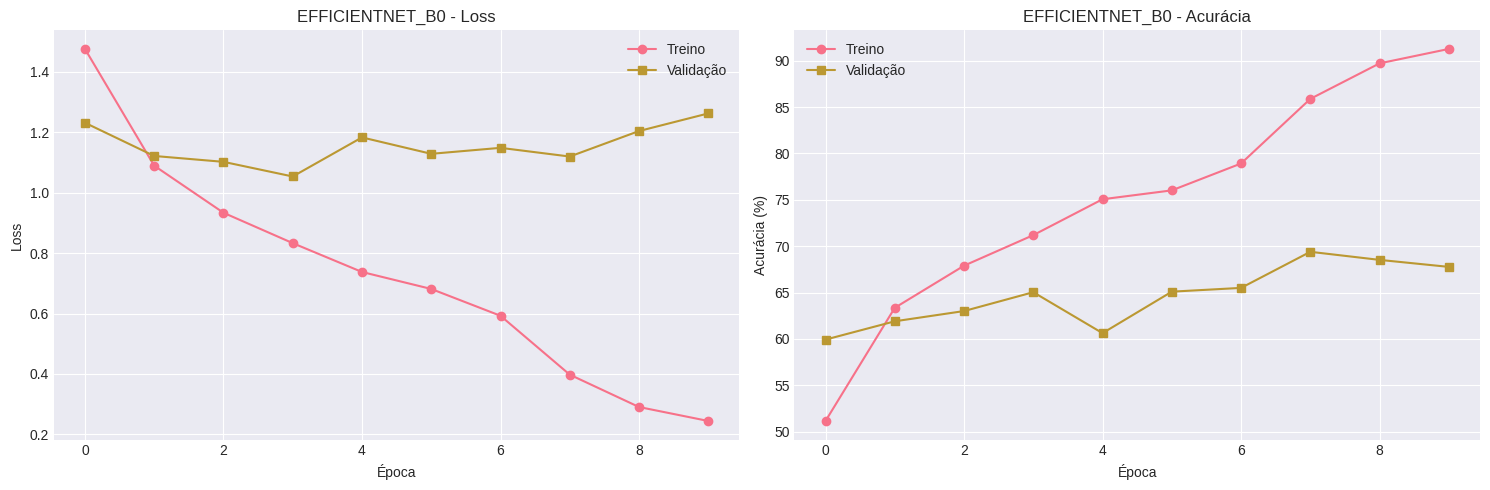

✓ Gráfico salvo: bloco06_historico_efficientnet_b0.png

📊 Avaliando EFFICIENTNET_B0 no conjunto de teste...

🔄 Carregando o melhor modelo salvo para avaliação...


Avaliando: 100%|██████████| 54/54 [00:15<00:00,  3.43it/s]


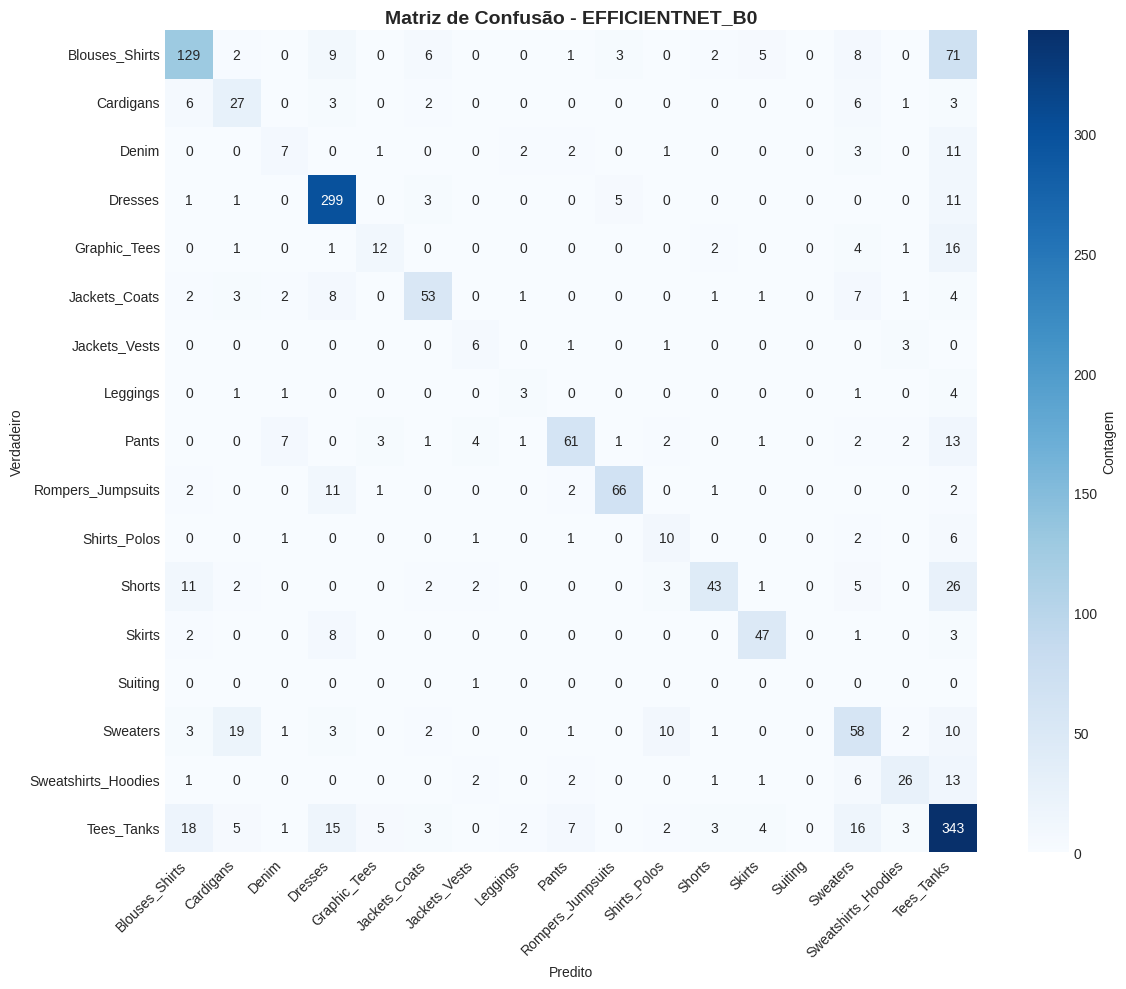

✓ Matriz de confusão salva: bloco06_matriz_confusao_efficientnet_b0.png

✓ EFFICIENTNET_B0 - Resultados:
  Acurácia de Treino: 91.27%
  Acurácia de Validação: 67.77%
  Acurácia de Teste: 69.11%
  Precision: 69.98%
  Recall: 69.11%
  F1-Score: 68.57%
  Tempo de treinamento: 970.5s

✓ Métricas baseline salvas em: bloco06_baseline_metrics.json

TREINAMENTO CONCLUÍDO COM SUCESSO!
✓ Resumo salvo em: bloco06_saida.txt


In [6]:
"""
Script Principal de Execução - VERSÃO FUNCIONAL
Orquestra todo o pipeline: preparação, treinamento, avaliação e comparação
"""

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.models import (
    GoogLeNet_Weights, ResNet50_Weights, 
    MobileNet_V2_Weights, EfficientNet_B0_Weights
)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
from tqdm import tqdm
import time
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
import json  # Import json for saving metrics
warnings.filterwarnings('ignore')

# ============================================================
# CLASSE DATASET PERSONALIZADA
# ============================================================

class DeepFashionDataset(Dataset):
    """
    Dataset personalizado para o DeepFashion-1.
    Carrega imagens e extrai categorias dos nomes dos arquivos.
    """
    
    def __init__(self, image_paths, labels, transform=None):
        """
        Args:
            image_paths (list): Lista de caminhos para as imagens
            labels (list): Lista de labels (índices das categorias)
            transform: Transformações a aplicar nas imagens
        """
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        """Retorna o número total de amostras."""
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        """
        Carrega e retorna uma amostra do dataset.
        
        Args:
            idx (int): Índice da amostra
            
        Returns:
            tuple: (imagem_transformada, label)
        """
        # Carrega a imagem
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        
        # Aplica transformações se fornecidas
        if self.transform:
            image = self.transform(image)
        
        # Retorna imagem e label
        label = self.labels[idx]
        return image, label

# ============================================================
# FUNÇÕES DE PREPARAÇÃO DE DADOS
# ============================================================

def carregar_dados_deepfashion(dataset_path='/kaggle/input/deepfashion-1/datasets'):
    """
    Carrega todas as imagens do DeepFashion-1 e extrai categorias.
    
    Returns:
        tuple: (image_paths, labels, label_to_idx, idx_to_label)
    """
    print("\n📂 Carregando imagens do dataset...")
    
    dataset_path = Path(dataset_path)
    
    # Busca todas as imagens
    image_paths = []
    for folder in ['train_images', 'test_images']:
        folder_path = dataset_path / folder
        if folder_path.exists():
            image_paths.extend(list(folder_path.glob('*.jpg')))
            image_paths.extend(list(folder_path.glob('*.png')))
    
    print(f"✓ Total de imagens encontradas: {len(image_paths)}")
    
    # Extrai categorias dos nomes dos arquivos
    # Formato: GENDER-CATEGORY-id_XXXXX-XX_X_view.png
    categorias = []
    for img_path in image_paths:
        parts = img_path.stem.split('-')
        if len(parts) >= 2:
            categoria = parts[1]  # Segunda parte é a categoria
            categorias.append(categoria)
        else:
            categorias.append('Unknown')
    
    # Cria mapeamento de categorias para índices
    categorias_unicas = sorted(list(set(categorias)))
    label_to_idx = {cat: idx for idx, cat in enumerate(categorias_unicas)}
    idx_to_label = {idx: cat for cat, idx in label_to_idx.items()}
    
    # Converte categorias para índices
    labels = [label_to_idx[cat] for cat in categorias]
    
    print(f"✓ Categorias encontradas: {len(categorias_unicas)}")
    print(f"  Categorias: {', '.join(categorias_unicas[:5])}...")
    
    return image_paths, labels, label_to_idx, idx_to_label

def criar_dataloaders(image_paths, labels, batch_size=32, val_split=0.15, test_split=0.15):
    """
    Cria dataloaders para treino, validação e teste.
    
    Args:
        image_paths: Lista de caminhos das imagens
        labels: Lista de labels
        batch_size: Tamanho do batch
        val_split: Proporção para validação
        test_split: Proporção para teste
        
    Returns:
        tuple: (train_loader, val_loader, test_loader, num_classes)
    """
    print("\n🔄 Criando dataloaders...")
    
    # Define transformações
    transform_train = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    transform_val = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # Calcula tamanhos dos splits
    total_size = len(image_paths)
    test_size = int(total_size * test_split)
    val_size = int(total_size * val_split)
    train_size = total_size - test_size - val_size
    
    # Cria índices aleatórios
    indices = torch.randperm(total_size).tolist()
    train_indices = indices[:train_size]
    val_indices = indices[train_size:train_size+val_size]
    test_indices = indices[train_size+val_size:]
    
    # Separa dados
    train_paths = [image_paths[i] for i in train_indices]
    train_labels = [labels[i] for i in train_indices]
    
    val_paths = [image_paths[i] for i in val_indices]
    val_labels = [labels[i] for i in val_indices]
    
    test_paths = [image_paths[i] for i in test_indices]
    test_labels = [labels[i] for i in test_indices]
    
    # Cria datasets
    train_dataset = DeepFashionDataset(train_paths, train_labels, transform=transform_train)
    val_dataset = DeepFashionDataset(val_paths, val_labels, transform=transform_val)
    test_dataset = DeepFashionDataset(test_paths, test_labels, transform=transform_val)
    
    # Cria dataloaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
    
    num_classes = len(set(labels))
    
    print(f"✓ Dataloaders criados:")
    print(f"  - Treino: {len(train_dataset)} amostras ({len(train_loader)} batches)")
    print(f"  - Validação: {len(val_dataset)} amostras ({len(val_loader)} batches)")
    print(f"  - Teste: {len(test_dataset)} amostras ({len(test_loader)} batches)")
    print(f"  - Número de classes: {num_classes}")
    
    return train_loader, val_loader, test_loader, num_classes

# ============================================================
# FUNÇÕES DE CRIAÇÃO DE MODELOS
# ============================================================

def criar_modelo(nome_modelo, num_classes, pretrained=True):
    """
    Cria um modelo com transfer learning.
    
    Args:
        nome_modelo: Nome do modelo ('googlenet', 'resnet50', etc.)
        num_classes: Número de classes de saída
        pretrained: Se deve usar pesos pré-treinados
        
    Returns:
        nn.Module: Modelo criado
    """
    if nome_modelo == 'googlenet':
        weights = GoogLeNet_Weights.DEFAULT if pretrained else None
        modelo = models.googlenet(weights=weights)
        modelo.fc = nn.Linear(modelo.fc.in_features, num_classes)
        
    elif nome_modelo == 'resnet50':
        weights = ResNet50_Weights.DEFAULT if pretrained else None
        modelo = models.resnet50(weights=weights)
        modelo.fc = nn.Linear(modelo.fc.in_features, num_classes)
        
    elif nome_modelo == 'mobilenet_v2':
        weights = MobileNet_V2_Weights.DEFAULT if pretrained else None
        modelo = models.mobilenet_v2(weights=weights)
        modelo.classifier[1] = nn.Linear(modelo.classifier[1].in_features, num_classes)
        
    elif nome_modelo == 'efficientnet_b0':
        weights = EfficientNet_B0_Weights.DEFAULT if pretrained else None
        modelo = models.efficientnet_b0(weights=weights)
        modelo.classifier[1] = nn.Linear(modelo.classifier[1].in_features, num_classes)
    
    else:
        raise ValueError(f"Modelo {nome_modelo} não suportado")
    
    return modelo

# ============================================================
# FUNÇÕES DE TREINAMENTO
# ============================================================

def treinar_modelo(modelo, train_loader, val_loader, device, num_epochs=10, lr=0.001):
    """
    Treina um modelo.
    
    Args:
        modelo: Modelo a treinar
        train_loader: DataLoader de treino
        val_loader: DataLoader de validação
        device: Device (cuda/cpu)
        num_epochs: Número de épocas
        lr: Learning rate
        
    Returns:
        dict: Histórico de treinamento
    """
    modelo = modelo.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(modelo.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5)
    
    historico = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }
    
    melhor_val_acc = 0.0
    
    for epoch in range(num_epochs):
        # Fase de treino
        modelo.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        pbar = tqdm(train_loader, desc=f'Época {epoch+1}/{num_epochs} [Treino]')
        for images, labels in pbar:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = modelo(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = outputs.max(1)
            train_total += labels.size(0)
            train_correct += predicted.eq(labels).sum().item()
            
            pbar.set_postfix({
                'loss': f'{train_loss/len(train_loader):.4f}',
                'acc': f'{100.*train_correct/train_total:.2f}%'
            })
        
        # Fase de validação
        modelo.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = modelo(images)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()
        
        # Calcula métricas
        train_loss = train_loss / len(train_loader)
        train_acc = 100. * train_correct / train_total
        val_loss = val_loss / len(val_loader)
        val_acc = 100. * val_correct / val_total
        
        # Salva histórico
        historico['train_loss'].append(train_loss)
        historico['train_acc'].append(train_acc)
        historico['val_loss'].append(val_loss)
        historico['val_acc'].append(val_acc)
        
        # Atualiza learning rate
        scheduler.step(val_loss)
        
        print(f'Época {epoch+1}: Train Loss={train_loss:.4f}, Train Acc={train_acc:.2f}%, '
              f'Val Loss={val_loss:.4f}, Val Acc={val_acc:.2f}%')
        
        # Salva melhor modelo
        if val_acc > melhor_val_acc:
            melhor_val_acc = val_acc
            torch.save(modelo.state_dict(), 'efficientnet_b0_otimizado.pth')
            print(f"✓ Melhor modelo salvo! (Val Acc: {val_acc:.2f}%)")
    
    return historico

# ============================================================
# FUNÇÕES DE AVALIAÇÃO
# ============================================================

def avaliar_modelo(modelo, test_loader, device, idx_to_label):
    """
    Avalia um modelo no conjunto de teste.
    
    Args:
        modelo: Modelo a avaliar
        test_loader: DataLoader de teste
        device: Device (cuda/cpu)
        idx_to_label: Mapeamento de índices para labels
        
    Returns:
        dict: Métricas de avaliação
    """
    print("\n🔄 Carregando o melhor modelo salvo para avaliação...")
    modelo.load_state_dict(torch.load('efficientnet_b0_otimizado.pth'))
    
    modelo.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc='Avaliando'):
            images = images.to(device)
            outputs = modelo(images)
            _, predicted = outputs.max(1)
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.numpy())
    
    # Cria lista de todos os labels possíveis (0 a num_classes-1)
    labels_list = list(range(len(idx_to_label)))
    
    # Calcula métricas
    accuracy = accuracy_score(all_labels, all_preds) * 100
    
    cm = confusion_matrix(all_labels, all_preds, labels=labels_list)
    
    # Classification report
    target_names = [idx_to_label[i] for i in range(len(idx_to_label))]
    report = classification_report(all_labels, all_preds, labels=labels_list, 
                                   target_names=target_names, output_dict=True, 
                                   zero_division=0)
    
    metricas = {
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'precision': report['weighted avg']['precision'] * 100,
        'recall': report['weighted avg']['recall'] * 100,
        'f1_score': report['weighted avg']['f1-score'] * 100,
        'predictions': all_preds,
        'labels': all_labels
    }
    
    return metricas

# ============================================================
# FUNÇÕES DE VISUALIZAÇÃO
# ============================================================

def plotar_historico(historico, nome_modelo):
    """Plota o histórico de treinamento."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Loss
    ax1.plot(historico['train_loss'], label='Treino', marker='o')
    ax1.plot(historico['val_loss'], label='Validação', marker='s')
    ax1.set_xlabel('Época')
    ax1.set_ylabel('Loss')
    ax1.set_title(f'{nome_modelo.upper()} - Loss')
    ax1.legend()
    ax1.grid(True)
    
    # Accuracy
    ax2.plot(historico['train_acc'], label='Treino', marker='o')
    ax2.plot(historico['val_acc'], label='Validação', marker='s')
    ax2.set_xlabel('Época')
    ax2.set_ylabel('Acurácia (%)')
    ax2.set_title(f'{nome_modelo.upper()} - Acurácia')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.savefig(f'bloco06_historico_{nome_modelo}.png', dpi=150, bbox_inches='tight')
    plt.show()
    print(f"✓ Gráfico salvo: bloco06_historico_{nome_modelo}.png")

def plotar_matriz_confusao(cm, idx_to_label, nome_modelo):
    """Plota a matriz de confusão."""
    plt.figure(figsize=(12, 10))
    
    labels = [idx_to_label[i] for i in range(len(idx_to_label))]
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels,
                cbar_kws={'label': 'Contagem'})
    
    plt.title(f'Matriz de Confusão - {nome_modelo.upper()}', fontsize=14, fontweight='bold')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(f'bloco06_matriz_confusao_{nome_modelo}.png', dpi=150, bbox_inches='tight')
    plt.show()
    print(f"✓ Matriz de confusão salva: bloco06_matriz_confusao_{nome_modelo}.png")

# ============================================================
# PIPELINE PRINCIPAL
# ============================================================

def pipeline_completo():
    """Executa o pipeline completo."""
    print("\n" + "=" * 60)
    print("PROJETO: RECONHECIMENTO DE ROUPAS PARA DEFICIENTES VISUAIS")
    print("Dataset: DeepFashion-1")
    print("Modelo: EfficientNet-B0")
    print("=" * 60 + "\n")
    
    # Configuração
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"✓ Device: {device}")
    if device == 'cuda':
        print(f"  GPU: {torch.cuda.get_device_name(0)}")
    
    # Carrega dados
    image_paths, labels, label_to_idx, idx_to_label = carregar_dados_deepfashion()
    
    # Cria dataloaders
    train_loader, val_loader, test_loader, num_classes = criar_dataloaders(
        image_paths, labels, batch_size=32
    )
    
    nome_modelo = 'efficientnet_b0'
    NUM_EPOCHS = 10
    
    print("\n" + "=" * 60)
    print(f"TREINANDO: {nome_modelo.upper()}")
    print("=" * 60)
    
    # Cria modelo
    modelo = criar_modelo(nome_modelo, num_classes, pretrained=True)
    
    # Treina
    inicio = time.time()
    historico = treinar_modelo(modelo, train_loader, val_loader, device, 
                               num_epochs=NUM_EPOCHS, lr=0.001)
    tempo_total = time.time() - inicio
    
    # Plota histórico
    plotar_historico(historico, nome_modelo)
    
    # Avalia
    print(f"\n📊 Avaliando {nome_modelo.upper()} no conjunto de teste...")
    metricas = avaliar_modelo(modelo, test_loader, device, idx_to_label)
    
    # Plota matriz de confusão
    plotar_matriz_confusao(metricas['confusion_matrix'], idx_to_label, nome_modelo)
    
    resultados = {
        'train_acc': historico['train_acc'][-1],
        'val_acc': historico['val_acc'][-1],
        'test_acc': metricas['accuracy'],
        'precision': metricas['precision'],
        'recall': metricas['recall'],
        'f1_score': metricas['f1_score'],
        'epochs': NUM_EPOCHS,
        'time': tempo_total
    }
    
    print(f"\n✓ {nome_modelo.upper()} - Resultados:")
    print(f"  Acurácia de Treino: {resultados['train_acc']:.2f}%")
    print(f"  Acurácia de Validação: {resultados['val_acc']:.2f}%")
    print(f"  Acurácia de Teste: {resultados['test_acc']:.2f}%")
    print(f"  Precision: {resultados['precision']:.2f}%")
    print(f"  Recall: {resultados['recall']:.2f}%")
    print(f"  F1-Score: {resultados['f1_score']:.2f}%")
    print(f"  Tempo de treinamento: {tempo_total:.1f}s")
    
    baseline_metrics = {
        'model_name': 'efficientnet_b0',
        'train_acc': resultados['train_acc'],
        'val_acc': resultados['val_acc'],
        'test_acc': resultados['test_acc'],
        'precision': resultados['precision'],
        'recall': resultados['recall'],
        'f1_score': resultados['f1_score'],
        'epochs': NUM_EPOCHS,
        'time': tempo_total
    }
    
    # Salva em JSON
    with open('/kaggle/working/bloco06_baseline_metrics.json', 'w') as f:
        json.dump(baseline_metrics, f, indent=4)
    
    print("\n✓ Métricas baseline salvas em: bloco06_baseline_metrics.json")
    
    print("\n" + "=" * 60)
    print("TREINAMENTO CONCLUÍDO COM SUCESSO!")
    print("=" * 60)
    
    with open('/kaggle/working/bloco06_saida.txt', 'w', encoding='utf-8') as f:
        f.write("=" * 60 + "\n")
        f.write("BLOCO 6: TREINAMENTO DO MODELO BASELINE\n")
        f.write("Projeto: Reconhecimento de Roupas para Deficientes Visuais\n")
        f.write("=" * 60 + "\n\n")
        f.write(f"Device: {device}\n")
        f.write(f"Número de classes: {num_classes}\n")
        f.write(f"Épocas de treinamento: {NUM_EPOCHS}\n")
        f.write(f"Modelo: {nome_modelo.upper()}\n\n")
        f.write("=" * 60 + "\n")
        f.write("RESULTADOS DO MODELO\n")
        f.write("=" * 60 + "\n\n")
        f.write(f"{nome_modelo.upper()}:\n")
        f.write(f"  Train Accuracy: {resultados['train_acc']:.2f}%\n")
        f.write(f"  Val Accuracy: {resultados['val_acc']:.2f}%\n")
        f.write(f"  Test Accuracy: {resultados['test_acc']:.2f}%\n")
        f.write(f"  Precision: {resultados['precision']:.2f}%\n")
        f.write(f"  Recall: {resultados['recall']:.2f}%\n")
        f.write(f"  F1-Score: {resultados['f1_score']:.2f}%\n")
        f.write(f"  Tempo: {tempo_total:.1f}s\n\n")
        f.write("=" * 60 + "\n")
        f.write("Arquivos gerados:\n")
        f.write(f"  - bloco06_historico_{nome_modelo}.png\n")
        f.write(f"  - bloco06_matriz_confusao_{nome_modelo}.png\n")
        f.write("  - bloco06_baseline_metrics.json\n")
        f.write("  - bloco06_saida.txt\n")
        f.write("  - efficientnet_b0_otimizado.pth\n")
    
    print("✓ Resumo salvo em: bloco06_saida.txt")

# Execução
if __name__ == "__main__":
    pipeline_completo()


In [7]:
# ============================================================
# ETAPA 10: APLICAÇÃO WEB COM FEEDBACK DE ÁUDIO (STREAMLIT)
# ============================================================
# Este script cria uma aplicação web simples para demonstrar o uso do modelo
# com foco em acessibilidade para deficientes visuais.
#
# Funcionalidades:
# 1. Interface simples para upload de imagem (ou uso da câmera)
# 2. Classificação em tempo real usando o modelo EfficientNet-B0 otimizado
# 3. Feedback de áudio (Text-to-Speech) com o resultado
#
# Como usar no Kaggle:
# O Kaggle não expõe portas web diretamente. Este script gera o arquivo 'app.py'
# que pode ser baixado e executado localmente com:
# pip install streamlit gtts torch torchvision pillow
# streamlit run app.py
# ============================================================

import os

# Conteúdo do arquivo app.py
streamlit_code = """
import streamlit as st
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import os
from gtts import gTTS
import tempfile

# Configuração da página
st.set_page_config(
    page_title="Reconhecimento de Roupas Acessível",
    page_icon="👕",
    layout="centered"
)

# Título e descrição
st.title("👕 Reconhecimento de Roupas")
st.markdown("**Assistente para Deficientes Visuais**")
st.markdown("Faça upload de uma imagem para identificar a peça de roupa e ouvir o resultado.")

# ============================================================
# 1. CONFIGURAÇÃO DO MODELO
# ============================================================

@st.cache_resource
def carregar_modelo():
    # Definir dispositivo
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Recriar a arquitetura do modelo (EfficientNet-B0)
    # Importante: Deve ser idêntica à usada no treinamento
    try:
        # Tenta carregar com pesos (versões mais novas do torchvision)
        weights = models.EfficientNet_B0_Weights.DEFAULT
        model = models.efficientnet_b0(weights=weights)
    except:
        # Fallback para versões antigas
        model = models.efficientnet_b0(pretrained=True)
    
    # Ajustar a última camada para 17 classes (conforme nosso dataset)
    num_ftrs = model.classifier[1].in_features
    model.classifier[1] = nn.Linear(num_ftrs, 17)
    
    # Carregar os pesos treinados
    # Nota: No ambiente local, o usuário deve ter o arquivo .pth na mesma pasta
    model_path = "efficientnet_b0_otimizado.pth"
    
    if os.path.exists(model_path):
        try:
            model.load_state_dict(torch.load(model_path, map_location=device))
            st.success(f"Modelo carregado com sucesso! ({device})")
        except Exception as e:
            st.error(f"Erro ao carregar pesos do modelo: {e}")
            st.warning("Usando modelo não treinado apenas para demonstração da interface.")
    else:
        st.warning(f"Arquivo '{model_path}' não encontrado. Usando modelo base para demonstração.")
        st.info("Para funcionar corretamente, coloque o arquivo 'efficientnet_b0_otimizado.pth' na mesma pasta deste script.")
    
    model = model.to(device)
    model.eval()
    return model, device

# Carregar modelo
model, device = carregar_modelo()

# Definir as transformações (mesmas do treinamento/validação)
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Mapeamento de classes (índice -> nome)
# Deve corresponder exatamente ao usado no treinamento
classes = {
    0: 'Blazer', 1: 'Blouse', 2: 'Cardigan', 3: 'Coat', 4: 'Dress',
    5: 'Hoodie', 6: 'Jacket', 7: 'Jeans', 8: 'Jumpsuit', 9: 'Leggings',
    10: 'Pants', 11: 'Romper', 12: 'Shorts', 13: 'Skirt', 14: 'Sweater',
    15: 'Tank', 16: 'Tee'
}

# Tradução para português (para o áudio)
classes_pt = {
    'Blazer': 'Blazer', 'Blouse': 'Blusa', 'Cardigan': 'Cardigã', 
    'Coat': 'Casaco', 'Dress': 'Vestido', 'Hoodie': 'Moletom com capuz', 
    'Jacket': 'Jaqueta', 'Jeans': 'Calça Jeans', 'Jumpsuit': 'Macacão', 
    'Leggings': 'Legging', 'Pants': 'Calça', 'Romper': 'Macaquinho', 
    'Shorts': 'Shorts', 'Skirt': 'Saia', 'Sweater': 'Suéter', 
    'Tank': 'Regata', 'Tee': 'Camiseta'
}

# ============================================================
# 2. INTERFACE DE USUÁRIO
# ============================================================

# Opção de entrada: Upload ou Câmera
option = st.radio("Escolha a entrada:", ("Upload de Arquivo", "Usar Câmera"))

image = None

if option == "Upload de Arquivo":
    uploaded_file = st.file_uploader("Escolha uma imagem...", type=["jpg", "jpeg", "png"])
    if uploaded_file is not None:
        image = Image.open(uploaded_file).convert('RGB')
        st.image(image, caption='Imagem carregada', use_container_width=True)

elif option == "Usar Câmera":
    camera_input = st.camera_input("Tire uma foto")
    if camera_input is not None:
        image = Image.open(camera_input).convert('RGB')
        # Não precisa mostrar a imagem novamente pois o widget da câmera já mostra

# ============================================================
# 3. PREDIÇÃO E FEEDBACK DE ÁUDIO
# ============================================================

if image is not None:
    if st.button('Identificar Roupa'):
        with st.spinner('Analisando imagem...'):
            # Preprocessamento
            img_tensor = transform(image).unsqueeze(0).to(device)
            
            # Inferência
            with torch.no_grad():
                outputs = model(img_tensor)
                probabilities = torch.nn.functional.softmax(outputs, dim=1)
                confidence, predicted = torch.max(probabilities, 1)
                
            # Resultado
            class_idx = predicted.item()
            class_name = classes.get(class_idx, "Desconhecido")
            class_name_pt = classes_pt.get(class_name, class_name)
            conf_score = confidence.item() * 100
            
            # Exibir resultado visual
            st.success(f"Resultado: **{class_name}** ({class_name_pt})")
            st.info(f"Confiança: {conf_score:.1f}%")
            
            # Gerar áudio (Text-to-Speech)
            texto_fala = f"Esta peça de roupa parece ser um {class_name_pt}."
            
            try:
                # Criar arquivo de áudio temporário
                tts = gTTS(text=texto_fala, lang='pt')
                
                # Salvar em arquivo temporário
                with tempfile.NamedTemporaryFile(delete=False, suffix='.mp3') as fp:
                    temp_filename = fp.name
                    tts.save(temp_filename)
                
                # Reproduzir áudio
                st.audio(temp_filename, format='audio/mp3')
                
                # Limpar arquivo temporário (opcional, o SO limpa depois)
                # os.unlink(temp_filename)
                
            except Exception as e:
                st.error(f"Erro ao gerar áudio: {e}")
                st.text("Texto que seria falado: " + texto_fala)
"""

# Salvar o código no arquivo app.py
with open('app.py', 'w', encoding='utf-8') as f:
    f.write(streamlit_code)

print("Arquivo 'app.py' gerado com sucesso!")
print("Este arquivo contém o código da aplicação Streamlit.")
print("Para rodar localmente:")
print("1. Baixe o arquivo 'app.py' e o modelo 'efficientnet_b0_otimizado.pth'")
print("2. Instale as dependências: pip install streamlit gtts torch torchvision pillow")
print("3. Execute: streamlit run app.py")

# Criar arquivo de saída para log
with open('bloco10_saida.txt', 'w', encoding='utf-8') as f:
    f.write("============================================================\n")
    f.write("BLOCO 10: APLICAÇÃO WEB (STREAMLIT)\n")
    f.write("============================================================\n\n")
    f.write("Arquivo 'app.py' gerado com sucesso.\n")
    f.write("Este arquivo contém o código fonte da aplicação web.\n")
    f.write("Funcionalidades implementadas:\n")
    f.write("1. Carregamento do modelo EfficientNet-B0 otimizado\n")
    f.write("2. Interface para upload de imagem e câmera\n")
    f.write("3. Classificação em tempo real\n")
    f.write("4. Feedback de áudio (TTS) para acessibilidade\n")


Arquivo 'app.py' gerado com sucesso!
Este arquivo contém o código da aplicação Streamlit.
Para rodar localmente:
1. Baixe o arquivo 'app.py' e o modelo 'efficientnet_b0_otimizado.pth'
2. Instale as dependências: pip install streamlit gtts torch torchvision pillow
3. Execute: streamlit run app.py


In [8]:
"""
============================================================
BLOCO 8: EXPORTAÇÃO E DOWNLOAD DOS ARQUIVOS FINAIS
============================================================

Este script compacta todos os resultados gerados (imagens, tabelas, modelos)
em um arquivo ZIP para download fácil no Kaggle.

Autor: Projeto de Mestrado - Reconhecimento de Roupas para Deficientes Visuais
Dataset: DeepFashion-1
"""

import os
import zipfile
from pathlib import Path

print("=" * 60)
print("BLOCO 8: COMPACTAÇÃO E EXPORTAÇÃO DOS ARQUIVOS FINAIS")
print("=" * 60)
print()

# Diretório de trabalho do Kaggle
OUTPUT_DIR = Path('/kaggle/working')
ZIP_FILE_NAME = 'resultados_deepfashion_completo.zip'
ZIP_PATH = OUTPUT_DIR / ZIP_FILE_NAME

# Lista de todos os arquivos que devem ser incluídos no ZIP
# Organizados por bloco para facilitar identificação
arquivos_esperados = [
    # Bloco 1: Preparação de dados
    'bloco01_primeiras_10_imagens.png',
    'bloco01_distribuicao_categorias.png',
    'bloco01_saida.txt',  # Adicionado arquivo TXT
    
    # Bloco 6: Treinamento dos 4 modelos
    'bloco06_historico_googlenet.png',
    'bloco06_historico_resnet50.png',
    'bloco06_historico_mobilenet_v2.png',
    'bloco06_historico_efficientnet_b0.png',
    'bloco06_matriz_confusao_googlenet.png',
    'bloco06_matriz_confusao_resnet50.png',
    'bloco06_matriz_confusao_mobilenet_v2.png',
    'bloco06_matriz_confusao_efficientnet_b0.png',
    'bloco06_tabela_comparacao_modelos.png',
    'bloco06_saida.txt',  # Adicionado arquivo TXT
    'bloco06_baseline_metrics.json',
    
    # Bloco 7: Otimização do EfficientNet-B0
    'bloco07_tabela_comparacao_final.png',
    'bloco07_f1_score_por_classe.png',
    'bloco07_matriz_confusao_otimizada.png',
    'bloco07_historico_treinamento.png',
    'bloco07_saida.txt',  # Adicionado arquivo TXT
    
    # Bloco 9: Treinamento Final EfficientNet-B0
    'bloco09_historico_treinamento.png',
    'bloco09_matriz_confusao.png',
    'bloco09_saida.txt',
    'efficientnet_b0_otimizado.pth',
    
    # Bloco 10: Aplicação Web
    'app.py',
    'bloco10_saida.txt',
]

print("Procurando arquivos para compactar...")
print()

# Busca todos os arquivos .png, .csv e .pth no diretório de trabalho
arquivos_encontrados = []
arquivos_faltantes = []

for arquivo in arquivos_esperados:
    arquivo_path = OUTPUT_DIR / arquivo
    if arquivo_path.exists():
        arquivos_encontrados.append(arquivo_path)
        print(f"✓ Encontrado: {arquivo}")
    else:
        arquivos_faltantes.append(arquivo)
        print(f"✗ Faltando: {arquivo}")

# Também inclui quaisquer outros arquivos .png, .csv, .txt ou .pth que possam existir
outros_arquivos = []
for extensao in ['.png', '.csv', '.txt', '.pth', '.json']:  # Adicionado .json
    for arquivo in OUTPUT_DIR.glob(f'*{extensao}'):
        if arquivo not in arquivos_encontrados and arquivo.name != ZIP_FILE_NAME:
            outros_arquivos.append(arquivo)
            print(f"+ Adicional: {arquivo.name}")

print()
print("-" * 60)
print(f"Total de arquivos encontrados: {len(arquivos_encontrados)}")
print(f"Total de arquivos adicionais: {len(outros_arquivos)}")
print(f"Total de arquivos faltantes: {len(arquivos_faltantes)}")
print("-" * 60)
print()

# Combina todos os arquivos
todos_arquivos = arquivos_encontrados + outros_arquivos

if not todos_arquivos:
    print("⚠️  AVISO: Nenhum arquivo encontrado para compactar!")
    print("Verifique se os blocos anteriores foram executados corretamente.")
else:
    # Cria o arquivo ZIP
    print(f"Criando arquivo ZIP: {ZIP_FILE_NAME}")
    print()
    
    with zipfile.ZipFile(ZIP_PATH, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for arquivo in todos_arquivos:
            # Adiciona o arquivo ao ZIP mantendo apenas o nome (sem caminho completo)
            zipf.write(arquivo, arcname=arquivo.name)
            print(f"  Adicionado: {arquivo.name}")
    
    # Verifica o tamanho do arquivo ZIP
    tamanho_zip = ZIP_PATH.stat().st_size
    tamanho_mb = tamanho_zip / (1024 * 1024)
    
    print()
    print("=" * 60)
    print("✅ COMPACTAÇÃO CONCLUÍDA COM SUCESSO!")
    print("=" * 60)
    print(f"Arquivo ZIP: {ZIP_FILE_NAME}")
    print(f"Localização: {ZIP_PATH}")
    print(f"Tamanho: {tamanho_mb:.2f} MB")
    print(f"Total de arquivos: {len(todos_arquivos)}")
    print()
    print("📥 O arquivo ZIP está disponível no diretório 'Output' do Kaggle")
    print("   para download clicando nos três pontos ao lado do arquivo.")
    print("=" * 60)

# Lista o conteúdo do ZIP para verificação
print()
print("Conteúdo do arquivo ZIP:")
print("-" * 60)
with zipfile.ZipFile(ZIP_PATH, 'r') as zipf:
    for info in zipf.filelist:
        print(f"  {info.filename} ({info.file_size} bytes)")
print("-" * 60)


BLOCO 8: COMPACTAÇÃO E EXPORTAÇÃO DOS ARQUIVOS FINAIS

Procurando arquivos para compactar...

✓ Encontrado: bloco01_primeiras_10_imagens.png
✓ Encontrado: bloco01_distribuicao_categorias.png
✓ Encontrado: bloco01_saida.txt
✗ Faltando: bloco06_historico_googlenet.png
✗ Faltando: bloco06_historico_resnet50.png
✗ Faltando: bloco06_historico_mobilenet_v2.png
✓ Encontrado: bloco06_historico_efficientnet_b0.png
✗ Faltando: bloco06_matriz_confusao_googlenet.png
✗ Faltando: bloco06_matriz_confusao_resnet50.png
✗ Faltando: bloco06_matriz_confusao_mobilenet_v2.png
✓ Encontrado: bloco06_matriz_confusao_efficientnet_b0.png
✗ Faltando: bloco06_tabela_comparacao_modelos.png
✓ Encontrado: bloco06_saida.txt
✓ Encontrado: bloco06_baseline_metrics.json
✗ Faltando: bloco07_tabela_comparacao_final.png
✗ Faltando: bloco07_f1_score_por_classe.png
✗ Faltando: bloco07_matriz_confusao_otimizada.png
✗ Faltando: bloco07_historico_treinamento.png
✗ Faltando: bloco07_saida.txt
✗ Faltando: bloco09_historico_treinam